# WEB SCRAPING -  Analyse des statistiques standard des joueurs des 5 grandes ligues européennes 2023-2024. 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib

In [2]:
df = pd.read_html('https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats')[0]
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                     Rk             Player             Nation   
0                     1         Max Aarons            eng ENG   
1                     2   Brenden Aaronson             us USA   
2                     3    Paxten Aaronson             us USA   
3                     4   Yunis Abdelhamid             ma MAR   
4                     5  Salis Abdul Samed             gh GHA   
...                 ...                ...                ...   
2513               2418      Igor Zubeldia             es ESP   
2514               2419   Martín Zubimendi             es ESP   
2515               2420    Martin Ødegaard             no NOR   
2516               2421        Milan Đurić             ba BIH   
2517               2422   Mateusz Łęgowski             pl POL   

     Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                    Pos              Squad                Comp   
0                    DF        Bournemouth  eng Premier League   
1                    MF       Union Berlin       de Bundesliga   
2                    MF     Eint Frankfurt       de Bundesliga   
3                    DF              Reims          fr Ligue 1   
4                    MF               Lens          fr Ligue 1   
...                 ...                ...                 ...   
2513                 DF      Real Sociedad          es La Liga   
2514                 MF      Real Sociedad          es La Liga   
2515                 MF            Arsenal  eng Premier League   
2516                 FW      Hellas Verona          it Serie A   
2517                 MF        Salernitana          it Serie A   

     Unnamed: 6_level_0 Unnamed: 7_level_0 Playing Time         ...  \
                    Age               Born           MP Starts  ...   
0                24-001               2000           13     11  ...   
1                23-075               2000           11      4  ...   
2                20-132               2003            7      1  ...   
3                36-099               1987           16     16  ...   
4                23-285               2000           17     14  ...   
...                 ...                ...          ...    ...  ...   
2513             26-281               1997           18     17  ...   
2514             24-337               1999           19     17  ...   
2515             25-019               1998           17     17  ...   
2516             33-228               1990           17     10  ...   
2517             20-341               2003           17      7  ...   

     Per 90 Minutes                                                       \
                Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG   
0              0.09  0.09  0.00   0.09  0.00  0.07   0.07  0.00     0.07   
1              0.00  0.00  0.00   0.00  0.04  0.07   0.11  0.04     0.11   
2              0.89  0.89  0.00   0.89  0.11  0.07   0.19  0.11     0.19   
3              0.00  0.19  0.19   0.19  0.14  0.01   0.15  0.14     0.15   
4              0.00  0.00  0.00   0.00  0.06  0.04   0.10  0.06     0.10   
...             ...   ...   ...    ...   ...   ...    ...   ...      ...   
2513           0.06  0.06  0.00   0.06  0.02  0.04   0.06  0.02     0.06   
2514           0.06  0.28  0.22   0.28  0.11  0.06   0.17  0.11     0.17   
2515           0.18  0.42  0.12   0.30  0.24  0.21   0.45  0.14     0.35   
2516           0.09  0.46  0.28   0.37  0.30  0.10   0.40  0.15     0.26   
2517           0.00  0.00  0.00   0.00  0.01  0.02   0.03  0.01     0.03   

     Unnamed: 37_level_0  
                 Matches  
0                Matches  
1                Matches  
2                Matches  
3                Matches  
4                Matches  
...                  ...  
2513             Matches  
2514             Matches  
2515             Matches  
2516             Matches  
2517             Matches  

[2518 rows x 38 columns]

In [3]:
#Permet de voir le nombre de lignes et de colonnes de notre dataframe
df.shape

(2518, 38)

In [4]:
df.columns = df.columns.droplevel()
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-001,2000,13,11,...,0.09,0.09,0.00,0.09,0.00,0.07,0.07,0.00,0.07,Matches
1,2,Brenden Aaronson,us USA,MF,Union Berlin,de Bundesliga,23-075,2000,11,4,...,0.00,0.00,0.00,0.00,0.04,0.07,0.11,0.04,0.11,Matches
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-132,2003,7,1,...,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,Matches
3,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-099,1987,16,16,...,0.00,0.19,0.19,0.19,0.14,0.01,0.15,0.14,0.15,Matches
4,5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23-285,2000,17,14,...,0.00,0.00,0.00,0.00,0.06,0.04,0.10,0.06,0.10,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2418,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,26-281,1997,18,17,...,0.06,0.06,0.00,0.06,0.02,0.04,0.06,0.02,0.06,Matches
2514,2419,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24-337,1999,19,17,...,0.06,0.28,0.22,0.28,0.11,0.06,0.17,0.11,0.17,Matches
2515,2420,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25-019,1998,17,17,...,0.18,0.42,0.12,0.30,0.24,0.21,0.45,0.14,0.35,Matches
2516,2421,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-228,1990,17,10,...,0.09,0.46,0.28,0.37,0.30,0.10,0.40,0.15,0.26,Matches


In [5]:
#Voir le type de donnée dans chaque colonnes
df.dtypes

Rk          object
Player      object
Nation      object
Pos         object
Squad       object
Comp        object
Age         object
Born        object
MP          object
Starts      object
Min         object
90s         object
Gls         object
Ast         object
G+A         object
G-PK        object
PK          object
PKatt       object
CrdY        object
CrdR        object
xG          object
npxG        object
xAG         object
npxG+xAG    object
PrgC        object
PrgP        object
PrgR        object
Gls         object
Ast         object
G+A         object
G-PK        object
G+A-PK      object
xG          object
xAG         object
xG+xAG      object
npxG        object
npxG+xAG    object
Matches     object
dtype: object

In [6]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG',
       'npxG+xAG', 'Matches'],
      dtype='object')

# Nettoyage de donnée

<AxesSubplot:>

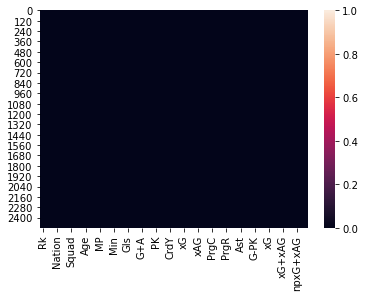

In [7]:
#Utiliser la heatmap pour voir les valeurs nulles
import seaborn as sns
sns.heatmap(df.isnull())

In [8]:
#Pour afficher le nombre de valeurs nulles dans chaque colonne
df.isnull().sum()

Rk          0
Player      0
Nation      2
Pos         0
Squad       0
Comp        0
Age         2
Born        2
MP          0
Starts      0
Min         0
90s         0
Gls         0
Ast         0
G+A         0
G-PK        0
PK          0
PKatt       0
CrdY        0
CrdR        0
xG          7
npxG        7
xAG         7
npxG+xAG    7
PrgC        7
PrgP        7
PrgR        7
Gls         0
Ast         0
G+A         0
G-PK        0
G+A-PK      0
xG          7
xAG         7
xG+xAG      7
npxG        7
npxG+xAG    7
Matches     0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
#Verifier si les valeurs null sont supprimer 
df.isnull().sum()

Rk          0
Player      0
Nation      0
Pos         0
Squad       0
Comp        0
Age         0
Born        0
MP          0
Starts      0
Min         0
90s         0
Gls         0
Ast         0
G+A         0
G-PK        0
PK          0
PKatt       0
CrdY        0
CrdR        0
xG          0
npxG        0
xAG         0
npxG+xAG    0
PrgC        0
PrgP        0
PrgR        0
Gls         0
Ast         0
G+A         0
G-PK        0
G+A-PK      0
xG          0
xAG         0
xG+xAG      0
npxG        0
npxG+xAG    0
Matches     0
dtype: int64

In [11]:
#Est-ce qu'il y'a des duplicata ?
df[df.duplicated()]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
51,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
77,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
103,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
129,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
155,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
2417,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
2443,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
2469,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches


In [12]:
#supprimer les duplicata
df.drop_duplicates(inplace = True)

<ipython-input-12-de9355df29b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [13]:
#Vérification si les duplicata ont bien ete supprimer
df[df.duplicated()]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches


In [14]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG',
       'npxG+xAG', 'Matches'],
      dtype='object')

In [15]:
# Supprimer les colonnes
df.drop([ 'Rk','90s','Born','npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
        'G+A-PK', 'xG+xAG', 'npxG',
       'npxG+xAG', 'Matches'
       ], axis=1, inplace=True)
df

/Users/elisetteossebi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls,...,CrdY,CrdR,xG,xAG,Gls,Ast,G+A,G-PK,xG,xAG
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-001,13,11,995,0,...,1,0,0.0,0.8,0.00,0.09,0.09,0.00,0.00,0.07
1,Brenden Aaronson,us USA,MF,Union Berlin,de Bundesliga,23-075,11,4,327,0,...,2,1,0.1,0.3,0.00,0.00,0.00,0.00,0.04,0.07
2,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-132,7,1,101,0,...,0,0,0.1,0.1,0.00,0.89,0.89,0.00,0.11,0.07
3,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-099,16,16,1440,3,...,3,0,2.2,0.2,0.19,0.00,0.19,0.19,0.14,0.01
4,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23-285,17,14,1249,0,...,2,0,0.8,0.5,0.00,0.00,0.00,0.00,0.06,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,26-281,18,17,1499,0,...,7,0,0.3,0.7,0.00,0.06,0.06,0.00,0.02,0.04
2514,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24-337,19,17,1608,4,...,3,0,2.0,1.1,0.22,0.06,0.28,0.22,0.11,0.06
2515,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25-019,17,17,1505,4,...,1,0,3.9,3.5,0.24,0.18,0.42,0.12,0.24,0.21
2516,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-228,17,10,977,4,...,2,0,3.2,1.1,0.37,0.09,0.46,0.28,0.30,0.10


In [16]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'xAG', 'Gls', 'Ast', 'G+A', 'G-PK', 'xG', 'xAG'],
      dtype='object')

In [17]:
# Renommer deux colonnes qui porte le même nom 
cols = []
count = 1
for column in df.columns:
    if column == 'xG':
        cols.append(f'xG{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [18]:
cols = []
count = 1
for column in df.columns:
    if column == 'xAG':
        cols.append(f'xAG{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [19]:
cols = []
count = 1
for column in df.columns:
    if column == 'Ast':
        cols.append(f'Ast{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [20]:
cols = []
count = 1
for column in df.columns:
    if column == 'Gls':
        cols.append(f'Gls{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [21]:
cols = []
count = 1
for column in df.columns:
    if column == 'G+A':
        cols.append(f'G+A{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [22]:
cols = []
count = 1
for column in df.columns:
    if column == 'G-PK':
        cols.append(f'G-PK{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [23]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', 'Gls1', 'Ast1', 'G+A1', 'G-PK1', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'xG1', 'xAG1', 'Gls2', 'Ast2', 'G+A2', 'G-PK2', 'xG2', 'xAG2'],
      dtype='object')

In [24]:
df['G-PK1']

0       0
1       0
2       0
3       3
4       0
       ..
2513    0
2514    4
2515    2
2516    3
2517    0
Name: G-PK1, Length: 2413, dtype: object

In [25]:
# Supprimer les colonnes
df.drop([ 'xG2','xAG2','Gls2','Ast2','G+A2','G-PK2'], axis=1, inplace=True)
df

/Users/elisetteossebi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-001,13,11,995,0,1,1,0,0,0,1,0,0.0,0.8
1,Brenden Aaronson,us USA,MF,Union Berlin,de Bundesliga,23-075,11,4,327,0,0,0,0,0,0,2,1,0.1,0.3
2,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-132,7,1,101,0,1,1,0,0,0,0,0,0.1,0.1
3,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-099,16,16,1440,3,0,3,3,0,0,3,0,2.2,0.2
4,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23-285,17,14,1249,0,0,0,0,0,0,2,0,0.8,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,26-281,18,17,1499,0,1,1,0,0,0,7,0,0.3,0.7
2514,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,24-337,19,17,1608,4,1,5,4,0,0,3,0,2.0,1.1
2515,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25-019,17,17,1505,4,3,7,2,2,2,1,0,3.9,3.5
2516,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-228,17,10,977,4,1,5,3,1,2,2,0,3.2,1.1


In [26]:
# Supprimer les premiers caractères de la colonne Nation
df['Nation'] = df['Nation'].str.slice(start=3)
df['Comp'] = df['Comp'].str.slice(start=3)

<ipython-input-26-65c31f6e76d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nation'] = df['Nation'].str.slice(start=3)
<ipython-input-26-65c31f6e76d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comp'] = df['Comp'].str.slice(start=3)


In [27]:
# Supprimer les quatre derniers caractères d'une colonne
df['Age'] = df['Age'].str.slice(stop=-4)

<ipython-input-27-c9a7318f5835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].str.slice(stop=-4)


In [28]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', 'Gls1', 'Ast1', 'G+A1', 'G-PK1', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'xG1', 'xAG1'],
      dtype='object')

In [29]:
df [(df['Player'] == 'Player')]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1
25,Player,ion,Pos,Squad,p,,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,xAG


In [30]:
df = df.drop(25)

In [31]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', 'Gls1', 'Ast1', 'G+A1', 'G-PK1', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'xG1', 'xAG1'],
      dtype='object')

# La data

In [32]:
#Convertir une colonne en Int
df['Age'] = df['Age'].astype(int)
df['MP'] = df['MP'].astype(int)
df['Starts'] = df['Starts'].astype(int)
df['Min'] = df['Min'].astype(int)
df['PK'] = df['PK'].astype(int)
df['PKatt'] = df['PKatt'].astype(int)
df['CrdY'] = df['CrdY'].astype(int)
df['CrdR'] = df['CrdR'].astype(int)
df['Ast1'] = df['Ast1'].astype(int)
df['G-PK1'] = df['G-PK1'].astype(int)


#Convertir colonne en Float
df['xG1'] = df['xG1'].astype(float)
df['xAG1'] = df['xAG1'].astype(float)
df['Gls1'] = df['Gls1'].astype(float)
df['G+A1'] = df['G+A1'].astype(float)


In [33]:
df.dtypes

Player     object
Nation     object
Pos        object
Squad      object
Comp       object
Age         int64
MP          int64
Starts      int64
Min         int64
Gls1      float64
Ast1        int64
G+A1      float64
G-PK1       int64
PK          int64
PKatt       int64
CrdY        int64
CrdR        int64
xG1       float64
xAG1      float64
dtype: object

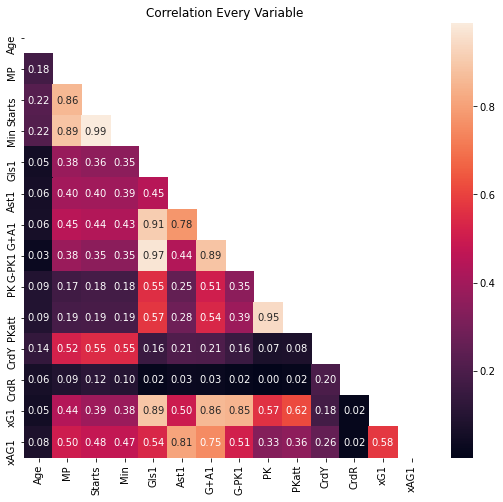

In [34]:
student_corr = df.corr()
mask = np.zeros_like(student_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9, 8))
ax = sns.heatmap(student_corr,mask=mask,
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Correlation Every Variable")
plt.show()

In [35]:
df['Pos'].unique()

array(['DF', 'MF', 'FW', 'MF,FW', 'FW,MF', 'MF,DF', 'DF,MF', 'GK',
       'DF,FW', 'FW,DF'], dtype=object)

# Analyse exploratoire des données

In [36]:
df[df['Age']==df['Age'].min()]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1
371,Francesco Camarda,ITA,FW,Milan,Serie A,15,2,0,14,0.0,0,0.0,0,0,0,0,0,0.0,0.0


Le joueur le plus jeune des 5 grandes ligues européennes est Francesco Camarda il a 15ans et joue en Serie A à Milan 

In [37]:
df[df['Age']==df['Age'].max()]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1
316,Claudio Bravo,CHI,GK,Betis,La Liga,40,7,7,630,0.0,0,0.0,0,0,0,0,0,0.0,0.0
535,Dante,BRA,DF,Nice,Ligue 1,40,17,17,1530,0.0,1,1.0,0,0,0,4,0,0.4,0.3
1547,Antonio Mirante,ITA,GK,Milan,Serie A,40,1,1,90,0.0,0,0.0,0,0,0,0,0,0.0,0.0


les joueurs les plus vieux des 5 grandes ligues européennes sont Claudio Bravo, Dante, Antonio Mirante agées de 40ans. 

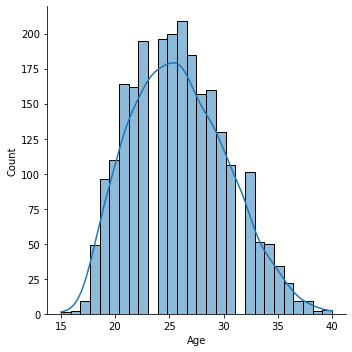

In [38]:
sns.displot(data=df, x="Age", kde=True )

Le graphique de densité ci-dessus a montré que la plupart des joueurs des 5 grandes ligues européennes 2023-2024
sont agée de 18 et 35ans, ce qui est l'âge d'un footballeur.

In [39]:
Championnat_but = df.groupby('Comp')['Gls1'].sum().sort_values(ascending = False)
Championnat_but

Comp
 Premier League    592.0
La Liga            494.0
Bundesliga         465.0
Serie A            439.0
Ligue 1            369.0
Name: Gls1, dtype: float64

<AxesSubplot:xlabel='Comp'>

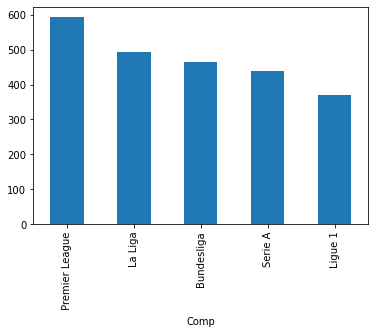

In [40]:
Championnat_but.plot(kind = 'bar')

La Premier League est le championnat qui marquer le plus de but des des 5 grandes ligues européennes.

In [41]:
df['Total_Cards'] = df['CrdY']+df['CrdR']

Aggressiv_Championnatt = df.groupby("Comp").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Aggressiv_Championnatt.sort_values(by=('Total_Cards', 'sum'))

,CrdY,CrdR,Total_Cards
,sum,sum,sum
Comp,,,
Ligue 1,570,32,602
Bundesliga,591,22,613
Serie A,821,33,854
Premier League,930,39,969
La Liga,958,54,1012


<AxesSubplot:xlabel='Comp'>

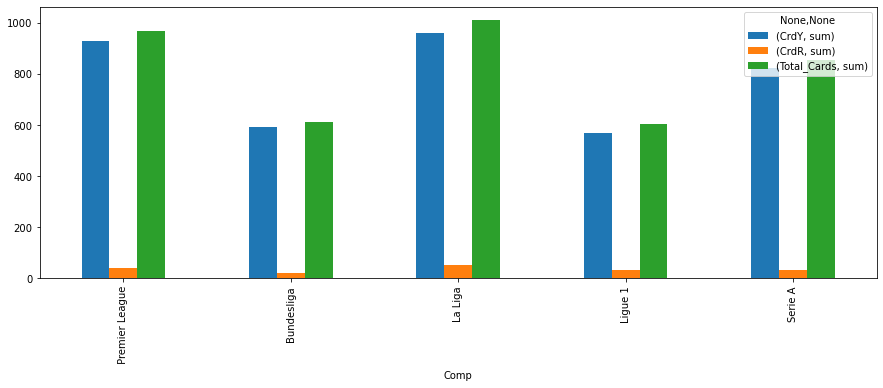

In [42]:
Aggressiv_Championnatt.plot(kind='bar',figsize=(15,5))

In [43]:
Moyenne_age = df.groupby('Comp').agg({'Age':['mean']})
Moyenne_age.sort_values(by=('Age', 'mean'))

,Age
,mean
Comp,
Ligue 1,24.777027
Premier League,25.802348
Serie A,25.960784
Bundesliga,25.981777
La Liga,26.755906


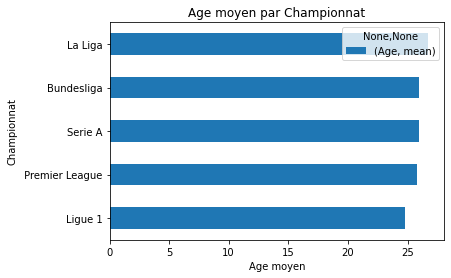

In [44]:
Moyenne_age.sort_values(by=('Age', 'mean')).plot(kind="barh")
plt.xlabel("Age moyen")
plt.ylabel("Championnat")
plt.title("Age moyen par Championnat")
plt.show()

Les joueurs les plus jeunes des 5 grandes ligues européennes 2023-2024 ce trouve en Ligue1 avec une moyenne d'age de 24ans 

In [45]:
df.groupby('Comp').agg({'Squad':['nunique']}).sort_values(by=('Squad', 'nunique'))

,Squad
,nunique
Comp,
Bundesliga,18
Ligue 1,18
Premier League,20
La Liga,20
Serie A,20


<AxesSubplot:>

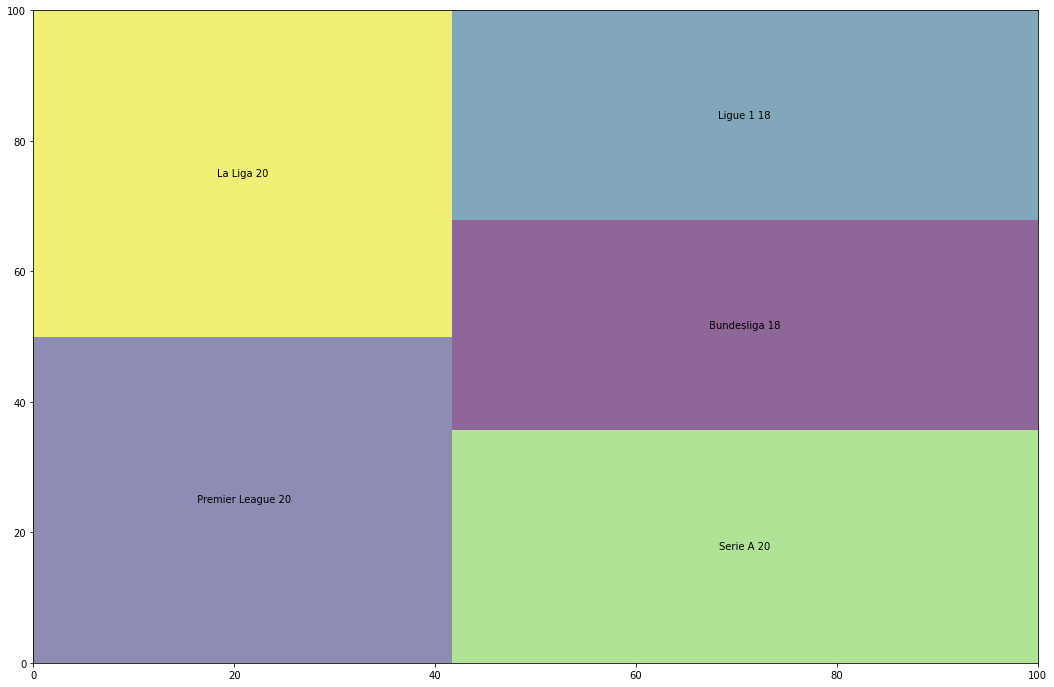

In [46]:
fig = plt.figure(figsize=(18,12))
sizes=df.groupby('Comp',)['Squad'].nunique().sort_values(ascending= False).tolist() 
label=df.groupby('Comp',)['Squad'].nunique().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [47]:
# L'équipe qui marque le plus 
but_par_equipe = df.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)
but_par_equipe

Squad
Bayern Munich      48.0
Girona             46.0
Leverkusen         44.0
Manchester City    44.0
Inter              42.0
                   ... 
Mainz 05           12.0
Lyon               12.0
Clermont Foot      11.0
Köln               10.0
Empoli              8.0
Name: Gls1, Length: 96, dtype: float64

<AxesSubplot:xlabel='Squad'>

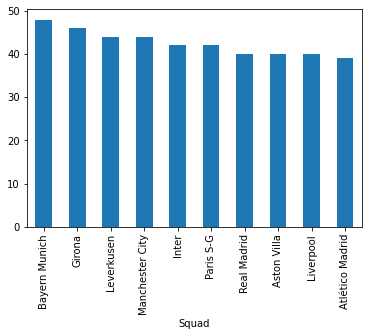

In [48]:
but_par_equipe.head(10).plot(kind="bar")

Le Bayern Munich est l'equipe qui a marqué le plus de buts des 5 grandes ligues européennes 48 buts suivi de Girona 46 buts Leverkusen et Manchester City 44 buts. Empoli est l'équipes qui a marquer le moins de but 8 au total.

In [49]:
# Meilleurs buteurs GLS1 == Buts
top_but= df[['Player', 'Squad', 'Gls1']].sort_values(by="Gls1", ascending=False)[:10]
top_but

,Player,Squad,Gls1
1121,Harry Kane,Bayern Munich,21.0
1470,Kylian Mbappé,Paris S-G,18.0
915,Serhou Guirassy,Stuttgart,17.0
1432,Lautaro Martínez,Inter,15.0
2028,Mohamed Salah,Liverpool,14.0
930,Erling Haaland,Manchester City,14.0
222,Jude Bellingham,Real Madrid,13.0
1462,Borja Mayoral,Getafe,12.0
1573,Álvaro Morata,Atlético Madrid,12.0
985,Son Heung-min,Tottenham,12.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Harry Kane'),
  Text(1, 0, 'Kylian Mbappé'),
  Text(2, 0, 'Serhou Guirassy'),
  Text(3, 0, 'Lautaro Martínez'),
  Text(4, 0, 'Mohamed Salah'),
  Text(5, 0, 'Erling Haaland'),
  Text(6, 0, 'Jude Bellingham'),
  Text(7, 0, 'Borja Mayoral'),
  Text(8, 0, 'Álvaro Morata'),
  Text(9, 0, 'Son Heung-min')])

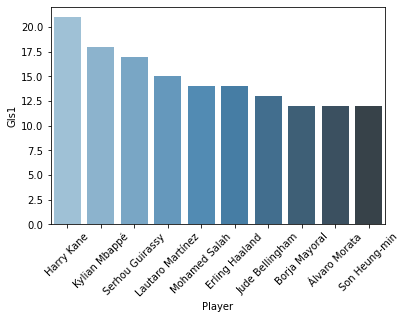

In [50]:
ax = sns.barplot(x="Player", y="Gls1", data=top_but,
                 palette="Blues_d")
plt.xticks(rotation=45)

Harry Kane 21 Buts est le meilleur buteur des 5 grandes ligues européennes suivi de Kylian Mbappé avec 18 Buts.

In [51]:
# Meilleurs passeurs Ast1 == Passeurs
top_assists= df[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_assists

,Player,Squad,Ast1
2058,Leroy Sané,Bayern Munich,8
2028,Mohamed Salah,Liverpool,8
2423,Ollie Watkins,Aston Villa,8
131,Pierre-Emerick Aubameyang,Marseille,7
251,Jan-Niklas Beste,Heidenheim,7
2328,Kieran Trippier,Newcastle Utd,7
286,Victor Boniface,Leverkusen,7
1649,Pedro Neto,Wolves,7
2449,Florian Wirtz,Leverkusen,7
313,Julian Brandt,Dortmund,7


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Leroy Sané'),
  Text(1, 0, 'Mohamed Salah'),
  Text(2, 0, 'Ollie Watkins'),
  Text(3, 0, 'Pierre-Emerick Aubameyang'),
  Text(4, 0, 'Jan-Niklas Beste'),
  Text(5, 0, 'Kieran Trippier'),
  Text(6, 0, 'Victor Boniface'),
  Text(7, 0, 'Pedro Neto'),
  Text(8, 0, 'Florian Wirtz'),
  Text(9, 0, 'Julian Brandt')])

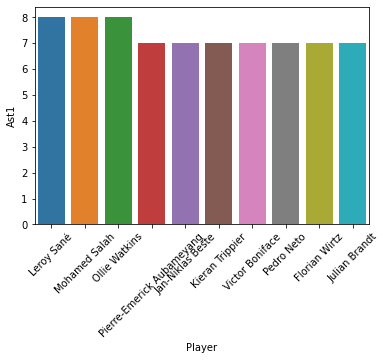

In [52]:
ax =sns.barplot(x='Player', y='Ast1', data=top_assists)
plt.xticks(rotation=45)

Leroy Sané 8 passe est le meilleur passeur des 5 grandes ligues européennes suivi de Kylian Mbappé avec 18 Buts.

In [53]:
# Meilleurs Buteurs(GLS1) + Passeur(Ast1)
top_but_passeur = df[['Player', 'Squad','Gls1','Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:10]
top_but_passeur

,Player,Squad,Gls1,Ast1,G+A1
1121,Harry Kane,Bayern Munich,21.0,5,26.0
2028,Mohamed Salah,Liverpool,14.0,8,22.0
1470,Kylian Mbappé,Paris S-G,18.0,2,20.0
930,Erling Haaland,Manchester City,14.0,4,18.0
915,Serhou Guirassy,Stuttgart,17.0,1,18.0
2423,Ollie Watkins,Aston Villa,9.0,8,17.0
985,Son Heung-min,Tottenham,12.0,5,17.0
1432,Lautaro Martínez,Inter,15.0,2,17.0
286,Victor Boniface,Leverkusen,10.0,7,17.0
2058,Leroy Sané,Bayern Munich,8.0,8,16.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Harry Kane'),
  Text(1, 0, 'Mohamed Salah'),
  Text(2, 0, 'Kylian Mbappé'),
  Text(3, 0, 'Erling Haaland'),
  Text(4, 0, 'Serhou Guirassy'),
  Text(5, 0, 'Ollie Watkins'),
  Text(6, 0, 'Son Heung-min'),
  Text(7, 0, 'Lautaro Martínez'),
  Text(8, 0, 'Victor Boniface'),
  Text(9, 0, 'Leroy Sané')])

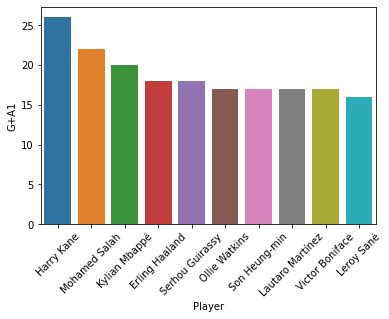

In [54]:
ax =sns.barplot(x='Player', y='G+A1', data=top_but_passeur)
plt.xticks(rotation=45)

Harry Kane est le meilleur buteur+ Passeur des 5 grandes ligues européennes suivi de Mohamed Salah.

In [55]:
# Buts sans pénalty
but_sans_penalty = df[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty

,Player,Squad,G-PK1
1121,Harry Kane,Bayern Munich,18
915,Serhou Guirassy,Stuttgart,14
1432,Lautaro Martínez,Inter,14
222,Jude Bellingham,Real Madrid,13
1470,Kylian Mbappé,Paris S-G,13
1573,Álvaro Morata,Atlético Madrid,12
306,Jarrod Bowen,West Ham,11
985,Son Heung-min,Tottenham,11
2170,Dominic Solanke,Bournemouth,11
930,Erling Haaland,Manchester City,11


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Harry Kane'),
  Text(1, 0, 'Serhou Guirassy'),
  Text(2, 0, 'Lautaro Martínez'),
  Text(3, 0, 'Jude Bellingham'),
  Text(4, 0, 'Kylian Mbappé'),
  Text(5, 0, 'Álvaro Morata'),
  Text(6, 0, 'Jarrod Bowen'),
  Text(7, 0, 'Son Heung-min'),
  Text(8, 0, 'Dominic Solanke'),
  Text(9, 0, 'Erling Haaland')])

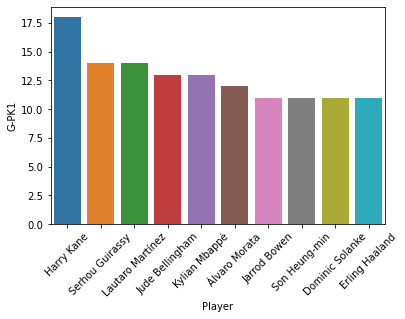

In [56]:
ax =sns.barplot(x='Player', y='G-PK1', data=but_sans_penalty)
plt.xticks(rotation=45)

Harry Kane est le meilleur buteurs sans penalty 5 grandes ligues européennes suivi de Mohamed Salah.

In [57]:
# xG (Buts attendus)
xG_Buts_attendus = df.groupby('Player')['xG1'].sum().sort_values(ascending = False)
xG_Buts_attendus

Player
Harry Kane           15.1
Kylian Mbappé        14.9
Erling Haaland       14.8
Mohamed Salah        14.3
Victor Boniface      12.1
                     ... 
Liam Henderson        0.0
Lisandro Martínez     0.0
Lorenzo Amatucci      0.0
Lorenzo Montipò       0.0
Łukasz Skorupski      0.0
Name: xG1, Length: 2363, dtype: float64

<AxesSubplot:xlabel='Player'>

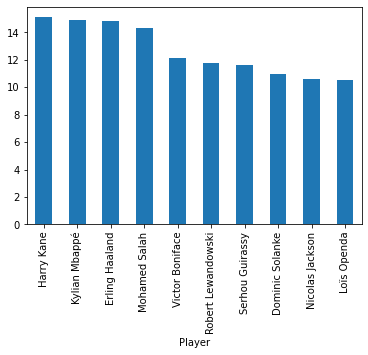

In [58]:
xG_Buts_attendus.head(10).plot(kind="bar")

Harry Kane a le meilleurs score xG (Buts attendus) des 5 grandes ligues européennes suivi de Kylian Mbappé.

In [59]:
# xAG (Buts assistés attendus)
xAG_Buts_assistés_attendus = df.groupby('Player')['xAG1'].sum().sort_values(ascending = False)
xAG_Buts_assistés_attendus

Player
Mohamed Salah       8.5
Leroy Sané          8.1
Julian Brandt       6.5
Kieran Trippier     6.3
Bruno Fernandes     6.3
                   ... 
Pietro Pellegri     0.0
Jason Steele        0.0
Jarell Quansah      0.0
Jannik Müller       0.0
Łukasz Skorupski    0.0
Name: xAG1, Length: 2363, dtype: float64

<AxesSubplot:xlabel='Player'>

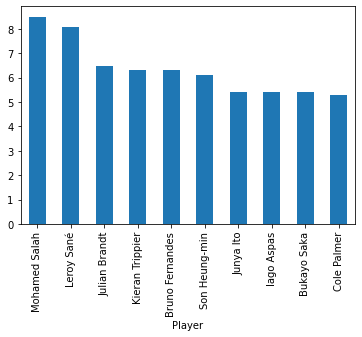

In [60]:
xAG_Buts_assistés_attendus.head(10).plot(kind="bar")

Mohamed Salah a le meilleurs score xAG (Buts assistés attendus) des 5 grandes ligues européennes suivi de Leroy Sané

In [61]:
# Le joueur les plus agressifs
df[['Player','CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
54,Iván Alejo,10,0,10
617,Djené,9,1,10
1268,Mario Lemina,9,1,10
52,Rubén Alcaraz,9,0,9
263,Yves Bissouma,7,2,9
918,Gerard Gumbau,9,0,9
1779,Leandro Paredes,9,0,9
315,Lilian Brassier,7,1,8
396,Sergi Cardona,8,0,8
664,Ondrej Duda,7,1,8


Le joueur les plus agressifs des 5 grandes ligues européennes est Iván Alejo avec 10 carton au total

In [62]:
# L'équipe la plus agressifs
team_cards = df.groupby(by='Squad', as_index=False)['Total_Cards'].sum().sort_values(by='Total_Cards',ascending=False)[:10]
team_cards

,Squad,Total_Cards
34,Getafe,89
82,Sheffield Utd,67
20,Chelsea,67
23,Cádiz,66
86,Tottenham,60
91,Villarreal,59
81,Sevilla,58
95,Wolves,57
73,Rayo Vallecano,57
3,Aston Villa,56


No handles with labels found to put in legend.


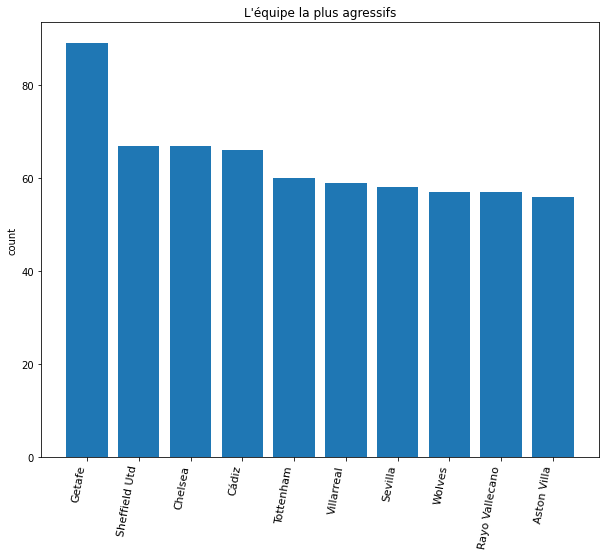

In [63]:
fig, ax = plt.subplots(figsize = (10,8))

x = team_cards["Squad"]
y = team_cards["Total_Cards"]


ax.bar(x, y)

ax.set_ylabel('count')
ax.set_title("L'équipe la plus agressifs")
ax.legend("Equipe")
ax.legend().set_visible(False)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)

plt.show()

Getafe est l'equipe la plus agressif des 5 grandes ligues européennes avec un total de 89 cartons 

# Premier League

In [64]:
Epl = df.query('Comp == " Premier League"')
Epl

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,13,11,995,0.0,1,1.0,0,0,0,1,0,0.0,0.8,1
12,Bénie Adama Traore,CIV,"FW,MF",Sheffield Utd,Premier League,21,8,3,387,0.0,0,0.0,0,0,0,0,0,0.3,0.5,0
16,Tosin Adarabioyo,ENG,DF,Fulham,Premier League,26,8,6,543,1.0,0,1.0,1,0,0,0,0,0.0,0.1,0
17,Elijah Adebayo,ENG,FW,Luton Town,Premier League,25,19,9,825,5.0,0,5.0,5,0,0,1,0,3.7,0.5,1
19,Simon Adingra,CIV,"FW,MF",Brighton,Premier League,22,17,13,1142,4.0,1,5.0,4,0,0,2,0,2.4,2.1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,Nicolò Zaniolo,ITA,"FW,MF",Aston Villa,Premier League,24,13,7,503,1.0,0,1.0,1,0,0,4,0,1.7,0.7,4
2492,Anass Zaroury,MAR,"FW,MF",Burnley,Premier League,23,5,1,137,0.0,0,0.0,0,0,0,0,1,0.2,0.0,1
2507,Oleksandr Zinchenko,UKR,DF,Arsenal,Premier League,27,18,14,1204,1.0,1,2.0,1,0,0,2,0,0.4,1.6,2
2512,Kurt Zouma,FRA,DF,West Ham,Premier League,29,16,16,1413,1.0,0,1.0,1,0,0,2,0,1.1,0.0,2


In [65]:
#Age minimum en PL
Epl[Epl['Age']==Epl['Age'].min()]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
1525,Lewis Miley,ENG,MF,Newcastle Utd,Premier League,17,9,8,658,1.0,1,2.0,1,0,0,1,0,1.2,1.2,1
1724,Ryan One,SCO,FW,Sheffield Utd,Premier League,17,1,0,8,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


Les joueurs les plus jeunes de la premiere league sont Lewis Miley de Newcastle Utd et Ryan One agées de 17ans 

In [66]:
#Age maximum en PL
Epl[Epl['Age']==Epl['Age'].max()]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
2135,Thiago Silva,BRA,DF,Chelsea,Premier League,39,19,18,1653,1.0,0,1.0,1,0,0,2,0,0.3,0.6,2


Thiago Silva de Chelsea est le joueur le plus âgé de la Premier League anglaise.

<Figure size 864x576 with 0 Axes>

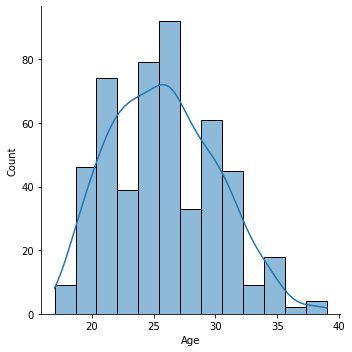

In [67]:
plt.figure(figsize=(12,8))
sns.displot(data=Epl, x="Age", kde=True )

Le graphique de densité ci-dessus a montré que la plupart des joueurs de la première league sont dans la mi-vingtaine, ce qui est l'âge d'un footballeur.

<AxesSubplot:>

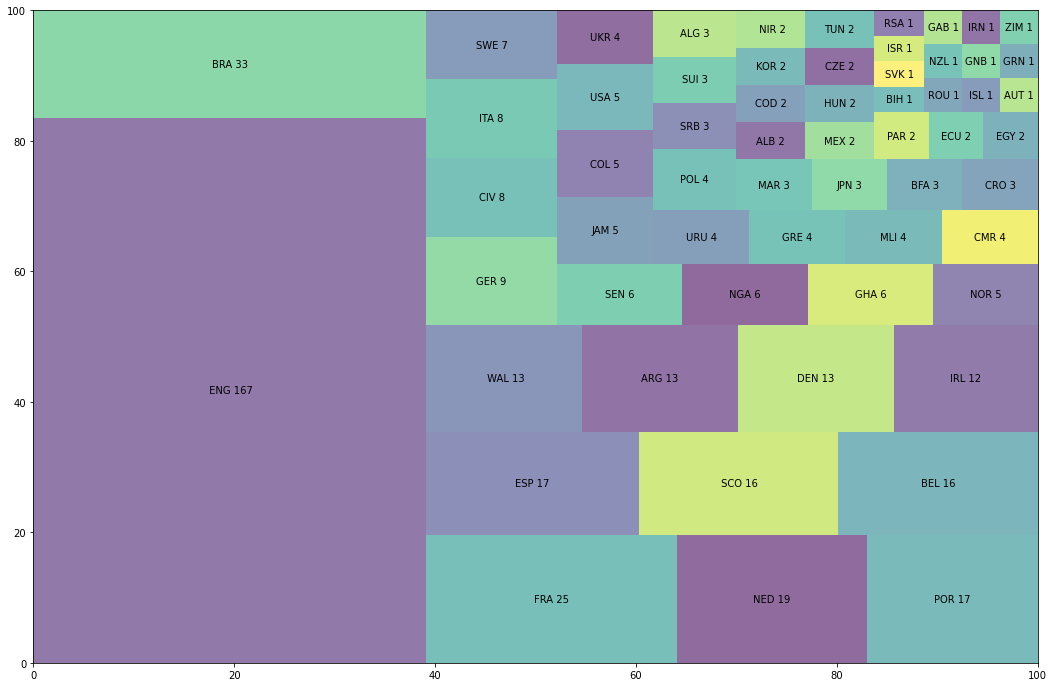

In [68]:
fig = plt.figure(figsize=(18,12))
sizes=Epl.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=Epl.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

La plupart des joueurs de première league viennent d'Angleterre (167) comme prévu, suivis de la Bresil (33), de la France (25).

<AxesSubplot:>

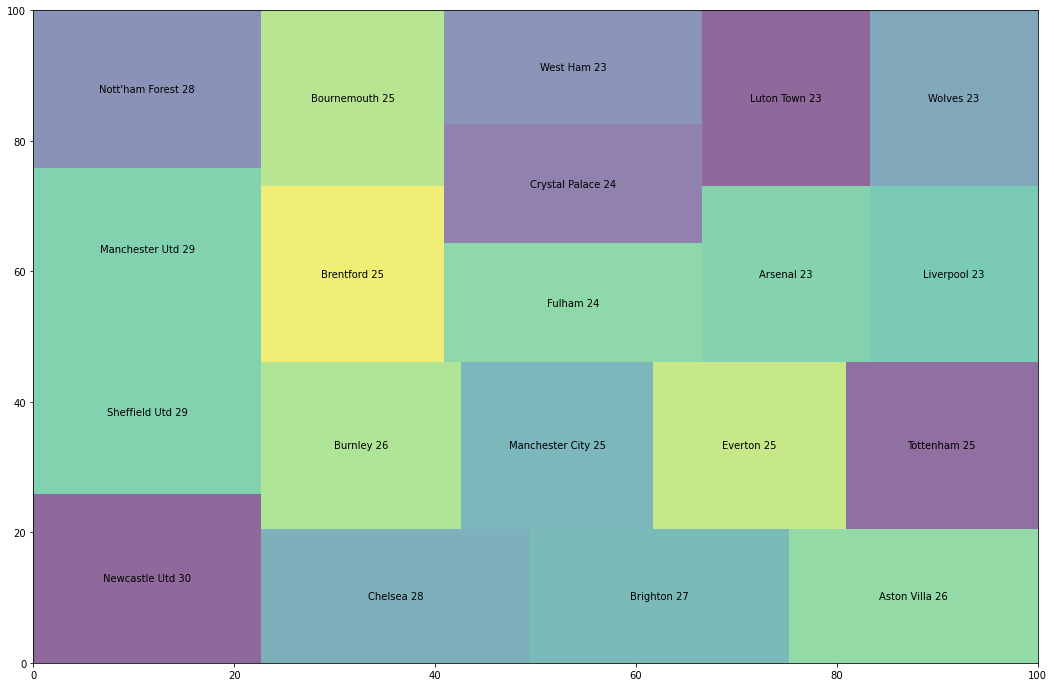

In [69]:
fig = plt.figure(figsize=(18,12))
sizes=Epl.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=Epl.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

Newcastle Utd est l'équipe qui compte le plus de joueurs 30

In [70]:
# L'équipe qui marque le plus en PL
but_par_equipe_pl = Epl.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)
but_par_equipe_pl

Squad
Manchester City    44.0
Liverpool          40.0
Aston Villa        40.0
Tottenham          39.0
Newcastle Utd      39.0
Arsenal            36.0
Brighton           36.0
Chelsea            33.0
West Ham           32.0
Wolves             29.0
Bournemouth        28.0
Fulham             27.0
Brentford          25.0
Everton            24.0
Nott'ham Forest    24.0
Crystal Palace     22.0
Manchester Utd     22.0
Burnley            20.0
Luton Town         20.0
Sheffield Utd      12.0
Name: Gls1, dtype: float64

<AxesSubplot:xlabel='Squad'>

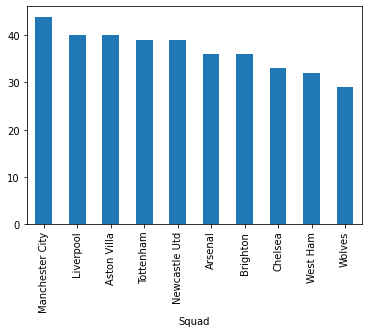

In [71]:
but_par_equipe_pl.head(10).plot(kind="bar")

In [72]:
# meilleur buteur de la PL
Top_buteur_PL = Epl[['Player', 'Squad', 'Gls1']].sort_values(by='Gls1', ascending = False)[:10]
Top_buteur_PL

,Player,Squad,Gls1
930,Erling Haaland,Manchester City,14.0
2028,Mohamed Salah,Liverpool,14.0
985,Son Heung-min,Tottenham,12.0
2170,Dominic Solanke,Bournemouth,12.0
306,Jarrod Bowen,West Ham,11.0
959,Hwang Hee-chan,Wolves,10.0
1032,Alexander Isak,Newcastle Utd,9.0
2423,Ollie Watkins,Aston Villa,9.0
1769,Cole Palmer,Chelsea,8.0
1475,Bryan Mbeumo,Brentford,7.0


<AxesSubplot:xlabel='Player'>

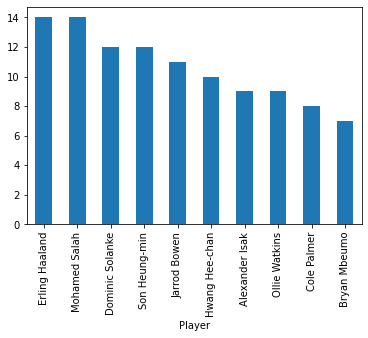

In [73]:
Top_buteur_PL.groupby('Player')['Gls1'].sum().sort_values(ascending = False).head(10).plot(kind="bar")

Erling Haaland et Mohamed Salah sont les meilleurs buteurs de PL avec 14 buts chacun 

In [74]:
#meilleurs passeur de la PL
top_assists_pl = Epl[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:5]
top_assists_pl

,Player,Squad,Ast1
2028,Mohamed Salah,Liverpool,8
2423,Ollie Watkins,Aston Villa,8
2328,Kieran Trippier,Newcastle Utd,7
1649,Pedro Neto,Wolves,7
689,Anthony Elanga,Nott'ham Forest,6


<AxesSubplot:xlabel='Player'>

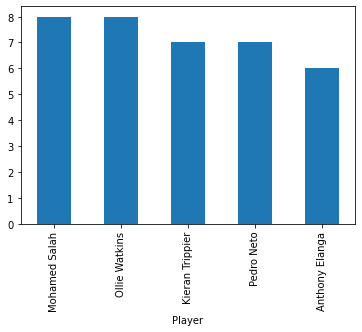

In [75]:
top_assists_pl.groupby('Player')['Ast1'].sum().sort_values(ascending = False).head(10).plot(kind="bar")

Mohamed Salah et Ollie Watkins sont les meilleurs passeur de PL avec 8 passes décisives chacun.

In [76]:
#Meilleurs buteurs + passeur de PL
top_but_passeur_pl = Epl[['Player', 'Squad','Gls1','Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:10]
top_but_passeur_pl

,Player,Squad,Gls1,Ast1,G+A1
2028,Mohamed Salah,Liverpool,14.0,8,22.0
930,Erling Haaland,Manchester City,14.0,4,18.0
2423,Ollie Watkins,Aston Villa,9.0,8,17.0
985,Son Heung-min,Tottenham,12.0,5,17.0
959,Hwang Hee-chan,Wolves,10.0,3,13.0
2170,Dominic Solanke,Bournemouth,12.0,1,13.0
306,Jarrod Bowen,West Ham,11.0,2,13.0
1769,Cole Palmer,Chelsea,8.0,4,12.0
2024,Bukayo Saka,Arsenal,6.0,6,12.0
518,Matheus Cunha,Wolves,6.0,5,11.0


Mohamed Salah est le meilleurs buteurs + passeur de PL 

In [77]:
#meilleurs buteurs sans penalty de la PL
but_sans_penalty_pl = Epl[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_pl

,Player,Squad,G-PK1
2170,Dominic Solanke,Bournemouth,11
306,Jarrod Bowen,West Ham,11
930,Erling Haaland,Manchester City,11
985,Son Heung-min,Tottenham,11
2028,Mohamed Salah,Liverpool,10
959,Hwang Hee-chan,Wolves,9
2423,Ollie Watkins,Aston Villa,9
1032,Alexander Isak,Newcastle Utd,7
2457,Chris Wood,Nott'ham Forest,7
1045,Nicolas Jackson,Chelsea,7


Dominic Solanke, Jarrod Bowen et Erling Haaland sont les meilleurs buteurs sans penalty de la PL

In [78]:
# xG (Buts attendus) PL
xG_Buts_attendus_PL= Epl[['Player', 'Squad', 'xG1']].sort_values(by="xG1", ascending=False)[:5]
xG_Buts_attendus_PL

,Player,Squad,xG1
930,Erling Haaland,Manchester City,14.8
2028,Mohamed Salah,Liverpool,14.3
2170,Dominic Solanke,Bournemouth,11.0
1045,Nicolas Jackson,Chelsea,10.6
1032,Alexander Isak,Newcastle Utd,9.2


Erling Haaland a le meilleurs score xG (Buts attendus) de la PL

In [79]:
# xAG (Buts assistés attendus)
xAG_Buts_assistés_attendus_pl = Epl.groupby('Player')['xAG1'].sum().sort_values(ascending = False)
xAG_Buts_assistés_attendus_pl

Player
Mohamed Salah       8.5
Kieran Trippier     6.3
Bruno Fernandes     6.3
Son Heung-min       6.1
Bukayo Saka         5.4
                   ... 
James Trafford      0.0
Jamie Donley        0.0
Jarell Quansah      0.0
Jason Steele        0.0
Łukasz Fabiański    0.0
Name: xAG1, Length: 504, dtype: float64

<AxesSubplot:xlabel='Player'>

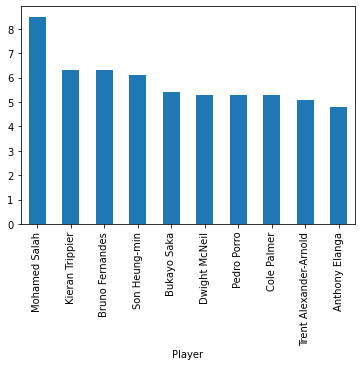

In [80]:
xAG_Buts_assistés_attendus_pl.head(10).plot(kind="bar")

Mohamed Salah a le meilleurs score xAG (Buts assistés attendus) de la PL

In [81]:
# Le joueur les plus agressifs de pl
Epl[['Player','CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
1268,Mario Lemina,9,1,10
263,Yves Bissouma,7,2,9
1045,Nicolas Jackson,8,0,8
1765,João Palhinha,8,0,8
2338,Destiny Udogie,7,1,8
69,Edson Álvarez,7,0,7
138,Jordan Ayew,6,1,7
243,Sander Berge,6,1,7
528,Diogo Dalot,6,1,7
737,Bruno Fernandes,7,0,7


Le joueur les plus agressifs de pl est Mario Lemina avec un total de 10 cartons

In [82]:
# L'équipe la plus agressif de PL
Aggressiv_pl = Epl.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Aggressiv_pl.sort_values(by=('Total_Cards', 'sum'))

,CrdY,CrdR,Total_Cards
,sum,sum,sum
Squad,,,
Arsenal,32,2,34
Bournemouth,35,1,36
Luton Town,36,0,36
Manchester City,35,2,37
Crystal Palace,39,1,40
Brentford,41,1,42
Liverpool,38,4,42
Burnley,42,4,46


<AxesSubplot:xlabel='Squad'>

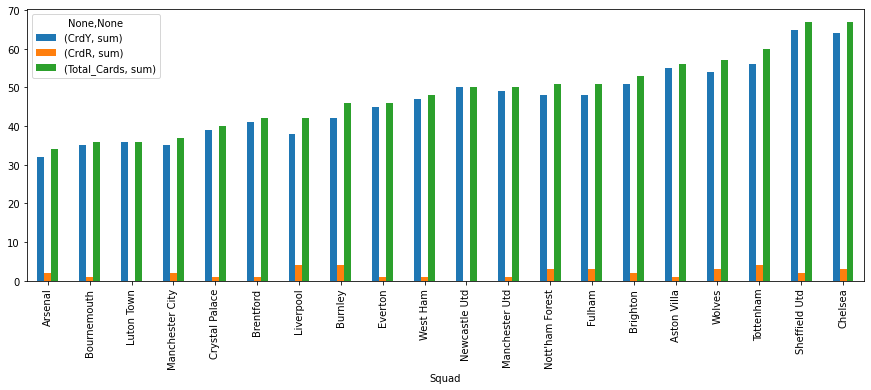

In [83]:
Aggressiv_pl.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

Chelsea est l'équipe la plus agressif de PL avec 67 cartons


# Ligue1

In [84]:
Ligue1 = df.groupby("Comp").get_group('Ligue 1')
Ligue1

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,36,16,16,1440,3.0,0,3.0,3,0,0,3,0,2.2,0.2,3
4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,23,17,14,1249,0.0,0,0.0,0,0,0,2,0,0.8,0.5,2
5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,17,17,1530,1.0,1,2.0,1,0,0,1,0,0.5,0.9,1
6,Matthis Abline,FRA,FW,Nantes,Ligue 1,20,10,5,420,1.0,0,1.0,1,0,0,0,0,0.8,1.5,0
8,Zakaria Aboukhlal,MAR,"MF,FW",Toulouse,Ligue 1,23,5,4,376,3.0,0,3.0,2,1,1,0,0,2.2,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,Warren Zaire-Emery,FRA,MF,Paris S-G,Ligue 1,17,14,12,1114,2.0,2,4.0,2,0,0,2,0,1.0,0.8,2
2480,Denis Zakaria,SUI,"MF,DF",Monaco,Ligue 1,27,14,13,1175,1.0,0,1.0,1,0,0,6,0,0.8,0.1,6
2494,Mehdi Zeffane,ALG,"DF,MF",Clermont Foot,Ligue 1,31,15,8,643,0.0,0,0.0,0,0,0,2,0,1.2,0.3,2
2502,Nathan Zeze,FRA,DF,Nantes,Ligue 1,18,1,1,90,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [85]:
Ligue1['Comp'].value_counts()

Ligue 1    444
Name: Comp, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

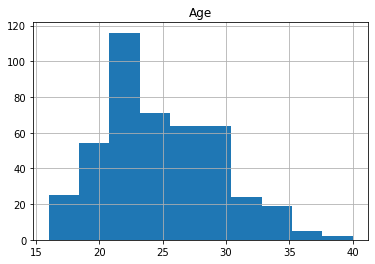

In [86]:
#histogramme de l'âge
Ligue1.hist(column='Age')

In [87]:
Ligue1['Age'].min()

16

In [88]:
Ligue1['Age'].max()

40

<AxesSubplot:>

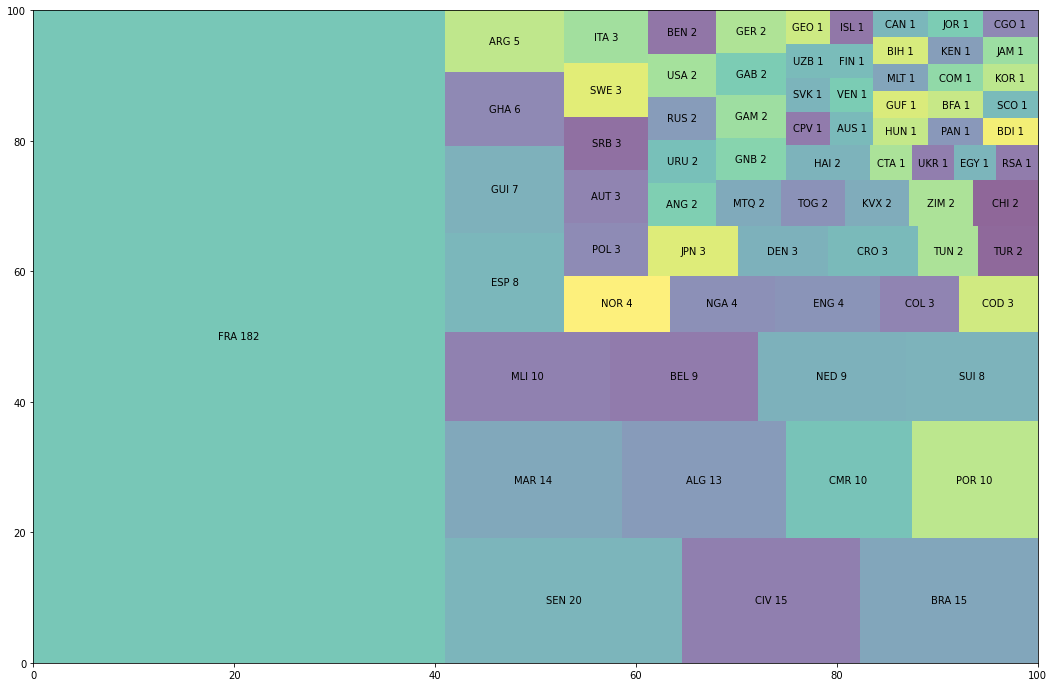

In [89]:
fig = plt.figure(figsize=(18,12))
sizes=Ligue1.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=Ligue1.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

<AxesSubplot:>

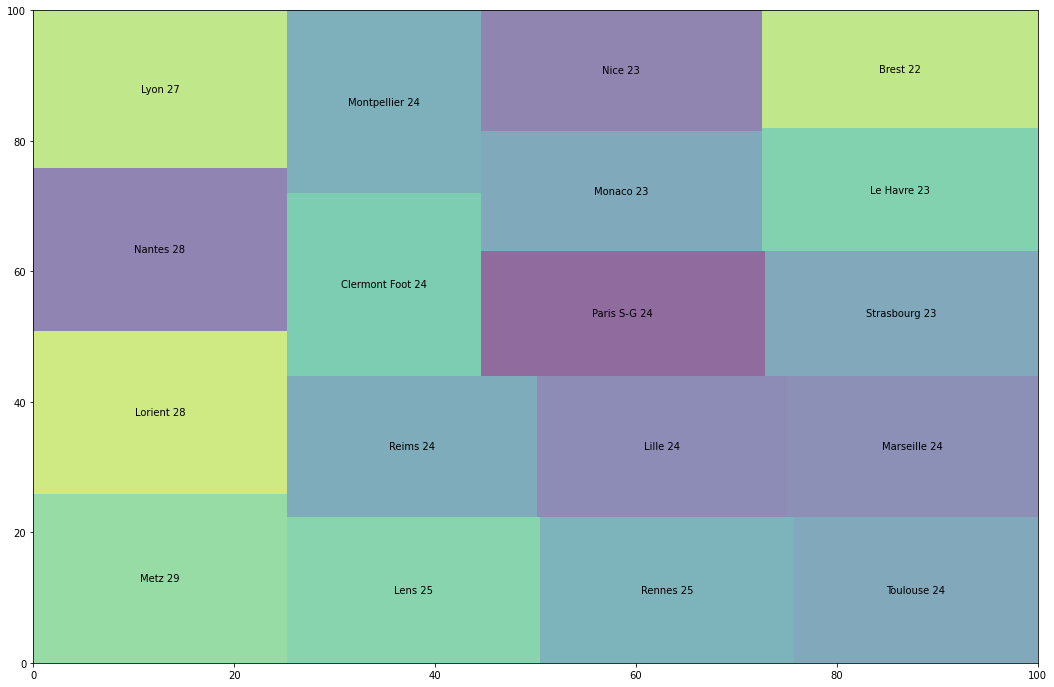

In [90]:
fig = plt.figure(figsize=(18,12))
sizes=Ligue1.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=Ligue1.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

la plus grande équipe de Ligue1 est Metz avec 29 joueurs

<AxesSubplot:xlabel='Squad'>

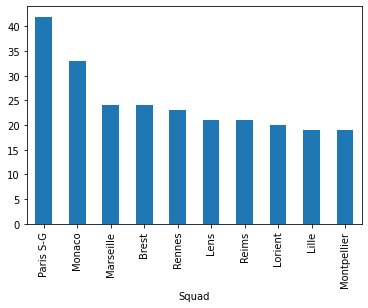

In [91]:
#L'équipe qui marque le plus en Ligue1
but_Equipe_Ligue1 = Ligue1.groupby('Squad')['Gls1'].sum().sort_values(ascending = False)
but_Equipe_Ligue1.head(10).plot(kind="bar")

Le PSG est l'équipe qui marque le plus qvec plus de 40 buts

<AxesSubplot:xlabel='Player'>

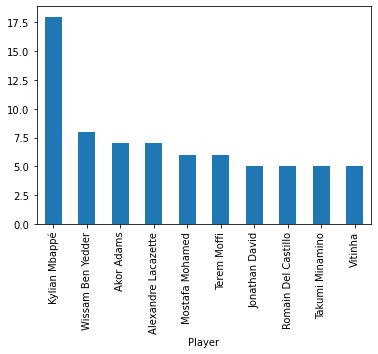

In [92]:
# meilleurs buteurs de Ligue1
top_but_Ligue1= Ligue1[['Player', 'Squad', 'Gls1']].sort_values(by="Gls1", ascending=False)[:10]
top_but_Ligue1.groupby('Player')['Gls1'].sum().sort_values(ascending = False).head(10).plot(kind="bar")


Kylian Mbappé est le meilleurs buteurs de la ligue 1 avec plus de 17 buts

In [93]:
# meilleurs passeurs de Ligue1
top_assists_Ligue1= Ligue1[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_assists_Ligue1

,Player,Squad,Ast1
131,Pierre-Emerick Aubameyang,Marseille,7
558,Romain Del Castillo,Brest,5
2182,Florian Sotoca,Lens,5
564,Ousmane Dembélé,Paris S-G,5
2503,Edon Zhegrova,Lille,4
1537,Takumi Minamino,Monaco,4
2141,Moses Simon,Nantes,4
2132,Caio Henrique Oliveira Silva,Monaco,4
536,Mohammed Daramy,Reims,4
2075,Téji Savanier,Montpellier,4


Pierre-Emerick Aubameyang est meilleur passeur de Ligue1

In [94]:
#Meilleurs buteurs + passeurs de Ligue1
top_but_passeur_Ligue1 = Ligue1[['Player', 'Squad','Gls1','Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:10]
top_but_passeur_Ligue1

,Player,Squad,Gls1,Ast1,G+A1
1470,Kylian Mbappé,Paris S-G,18.0,2,20.0
131,Pierre-Emerick Aubameyang,Marseille,5.0,7,12.0
558,Romain Del Castillo,Brest,5.0,5,10.0
1537,Takumi Minamino,Monaco,5.0,4,9.0
1558,Terem Moffi,Nice,6.0,2,8.0
229,Wissam Ben Yedder,Monaco,8.0,0,8.0
2182,Florian Sotoca,Lens,3.0,5,8.0
2399,Vitinha,Paris S-G,5.0,2,7.0
2075,Téji Savanier,Montpellier,3.0,4,7.0
652,Kamory Doumbia,Brest,5.0,2,7.0


Kylian Mbappé est meilleurs buteurs + passeurs de Ligue1

In [95]:
#le meilleurs buteurs sans penalty de la Ligue1 
but_sans_penalty_Ligue1 = Ligue1[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_Ligue1

,Player,Squad,G-PK1
1470,Kylian Mbappé,Paris S-G,13
229,Wissam Ben Yedder,Monaco,7
13,Akor Adams,Montpellier,7
1223,Alexandre Lacazette,Lyon,6
1558,Terem Moffi,Nice,5
848,Aleksandr Golovin,Monaco,5
527,Thijs Dallinga,Toulouse,5
652,Kamory Doumbia,Brest,5
2399,Vitinha,Paris S-G,5
718,Romain Faivre,Lorient,5


Kylian Mbappé meilleurs buteurs sans penalty de la Ligue1 

In [96]:
#le meilleur score xG Buts attendus de Ligue1
xG_Buts_attendus_Ligue1 = Ligue1[['Player','Squad','xG1']].sort_values(by="xG1",ascending = False)[:10]
xG_Buts_attendus_Ligue1

,Player,Squad,xG1
1470,Kylian Mbappé,Paris S-G,14.9
13,Akor Adams,Montpellier,8.7
131,Pierre-Emerick Aubameyang,Marseille,8.2
527,Thijs Dallinga,Toulouse,6.7
543,Jonathan David,Lille,6.1
1558,Terem Moffi,Nice,5.8
1223,Alexandre Lacazette,Lyon,5.1
1232,Mohamed Lamine Bayo,Le Havre,5.0
1253,Jérémy Le Douaron,Brest,4.8
1222,Gaëtan Laborde,Nice,4.7


Kylian Mbappé a le meilleurs score xG Buts attendus de Ligue1

In [97]:
#le meilleur score xAG Buts assistés attendus de Ligue1
xAG_Buts_assistés_attendus_Ligue1 = Ligue1[['Player','Squad','xAG1']].sort_values(by="xAG1",ascending = False)[:10]
xAG_Buts_assistés_attendus_Ligue1

,Player,Squad,xAG1
1041,Junya Ito,Reims,5.4
558,Romain Del Castillo,Brest,5.1
131,Pierre-Emerick Aubameyang,Marseille,4.4
2503,Edon Zhegrova,Lille,4.1
942,Achraf Hakimi,Paris S-G,4.0
2075,Téji Savanier,Montpellier,3.7
303,Benjamin Bourigeaud,Rennes,3.5
564,Ousmane Dembélé,Paris S-G,3.3
2379,Jordan Veretout,Marseille,3.2
2062,Morgan Sanson,Nice,3.2


Junya Ito a le meilleur score xAG Buts assistés attendus de Ligue1

In [98]:
# Les joueurs les plus agressive de Ligue1
Ligue1[['Player','CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
315,Lilian Brassier,7,1,8
1446,Nemanja Matić,7,0,7
2413,Elye Wahi,6,1,7
422,Maximiliano Caufriez,4,2,6
764,Thomas Foket,6,0,6
848,Aleksandr Golovin,5,1,6
876,Jonathan Gradit,6,0,6
1304,Renan Lodi,6,0,6
1488,Facundo Medina,6,0,6
1641,Rassoul Ndiaye,4,2,6


Lilian Brassier est le joueur les plus agressifs de Ligue1 avec 8 cartons au total

In [99]:
#L'équipe la plus agressive de ligue1
Aggressiv_Ligue1 = Ligue1.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Aggressiv_Ligue1.sort_values(by=('Total_Cards', 'sum'))

,CrdY,CrdR,Total_Cards
,sum,sum,sum
Squad,,,
Paris S-G,20,1,21
Metz,23,1,24
Reims,26,0,26
Strasbourg,26,1,27
Rennes,29,3,32
Lorient,32,0,32
Marseille,29,3,32
Le Havre,28,5,33


<AxesSubplot:xlabel='Squad'>

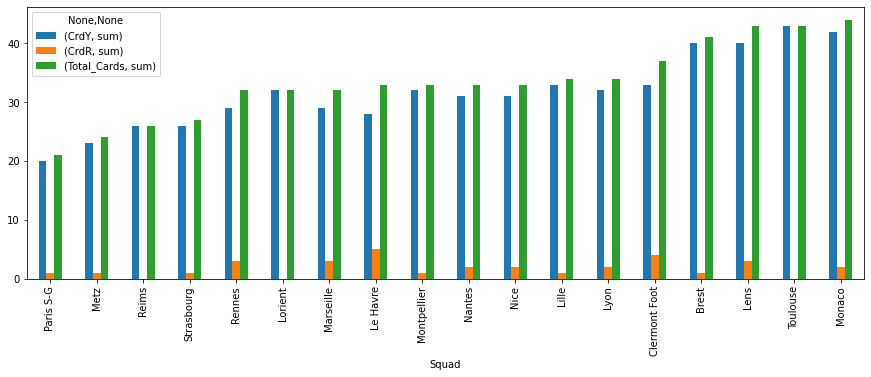

In [100]:
Aggressiv_Ligue1.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

Monaco est l'équipe la plus agressive de Ligue1

# La Liga

In [101]:
La_Liga = df.groupby("Comp").get_group('La Liga')
La_Liga

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
7,Abner,BRA,DF,Betis,La Liga,23,13,9,882,0.0,0,0.0,0,0,0,2,0,0.1,0.4,2
9,Abdel Abqar,MAR,DF,Alavés,La Liga,24,14,14,1254,0.0,0,0.0,0,0,0,5,0,0.3,0.0,5
11,Marcos Acuña,ARG,DF,Sevilla,La Liga,32,8,7,456,0.0,0,0.0,0,0,0,2,0,0.1,0.3,2
32,Joseph Aidoo,GHA,DF,Celta Vigo,La Liga,28,6,4,407,0.0,0,0.0,0,0,0,0,0,0.1,0.1,0
41,Ilias Akhomach,ESP,"MF,FW",Villarreal,La Liga,19,15,5,649,0.0,2,2.0,0,0,0,3,0,0.8,0.6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,Arsen Zakharyan,RUS,"MF,FW",Real Sociedad,La Liga,20,12,4,415,0.0,1,1.0,0,0,0,0,0,0.4,1.1,0
2482,Joseba Zaldúa,ESP,"DF,MF",Cádiz,La Liga,31,4,2,190,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
2491,Bryan Zaragoza,ESP,"MF,FW",Granada,La Liga,22,18,15,1379,6.0,2,8.0,5,1,1,5,0,3.6,3.0,5
2513,Igor Zubeldia,ESP,DF,Real Sociedad,La Liga,26,18,17,1499,0.0,1,1.0,0,0,0,7,0,0.3,0.7,7


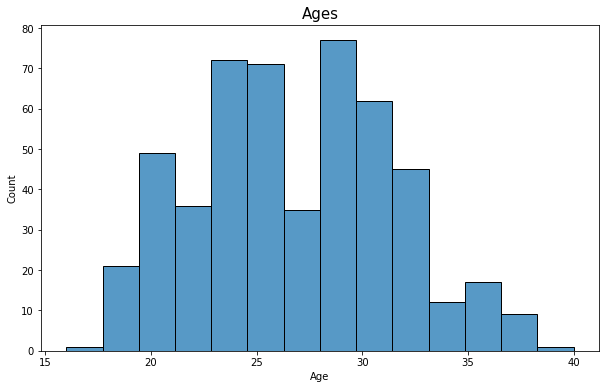

In [102]:
plt.figure(figsize=(10,6))
sns.histplot(La_Liga["Age"])
plt.title("Ages", size=15)
plt.show()

In [103]:
La_Liga[La_Liga['Age']==La_Liga['Age'].min()]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
2464,Lamine Yamal,ESP,"FW,DF",Barcelona,La Liga,16,19,7,802,1.0,1,2.0,1,0,0,2,0,2.2,2.8,2


Le joueur le plus jeune de Liga est Lamine Yamal 16 ans 

In [104]:
La_Liga[La_Liga['Age']==La_Liga['Age'].max()]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
316,Claudio Bravo,CHI,GK,Betis,La Liga,40,7,7,630,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


le joueur le plus vieux de liga est Claudio Bravo 40ans

In [105]:
La_Liga["Age"].mean()

26.755905511811022

<AxesSubplot:>

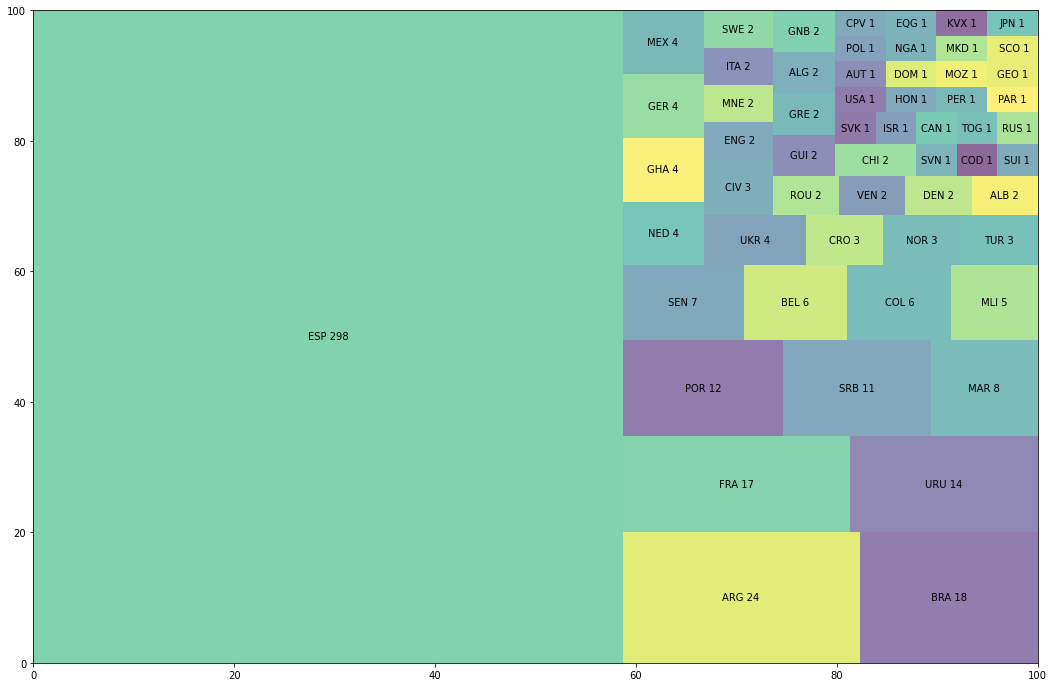

In [106]:
fig = plt.figure(figsize=(18,12))
sizes=La_Liga.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=La_Liga.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

298 des joueurs de Liga sont espagnol suivi des Argentin 24, bresil 18

<AxesSubplot:>

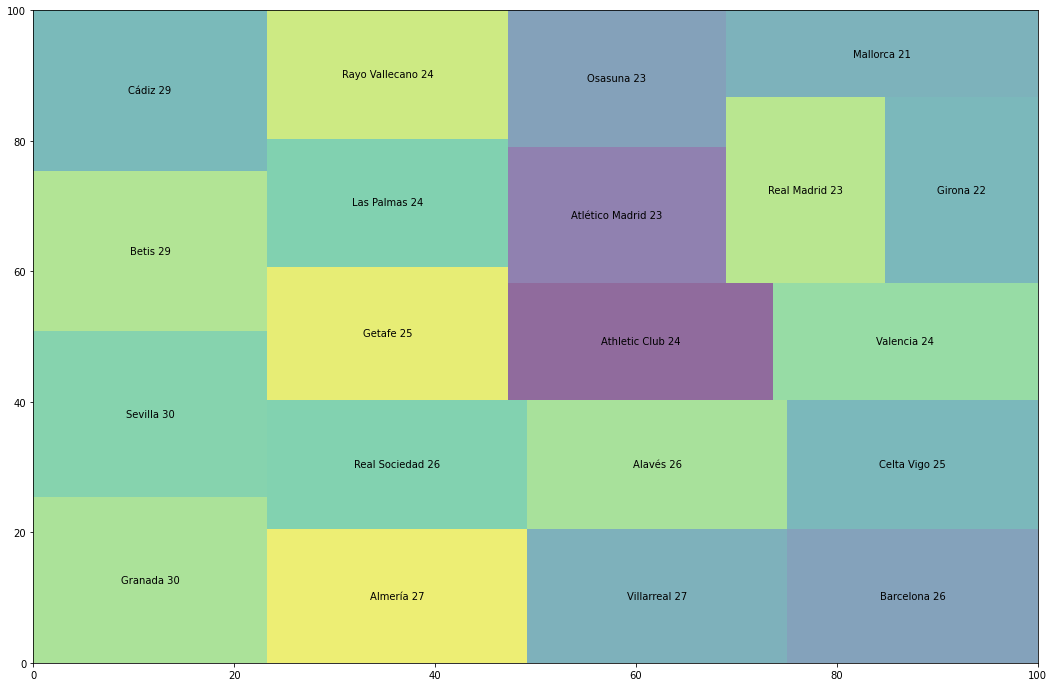

In [107]:
fig = plt.figure(figsize=(18,12))
sizes=La_Liga.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=La_Liga.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [108]:
#L'équipe qui marque le plus en Liga
but_Equipe_liga = La_Liga.groupby("Squad").agg({'Gls1':['sum']})
but_Equipe_liga.sort_values(by=('Gls1', 'sum'))

,Gls1
,sum
Squad,
Alavés,12.0
Cádiz,14.0
Las Palmas,16.0
Mallorca,17.0
Rayo Vallecano,18.0
Almería,19.0
Celta Vigo,19.0
Granada,20.0


<AxesSubplot:xlabel='Squad'>

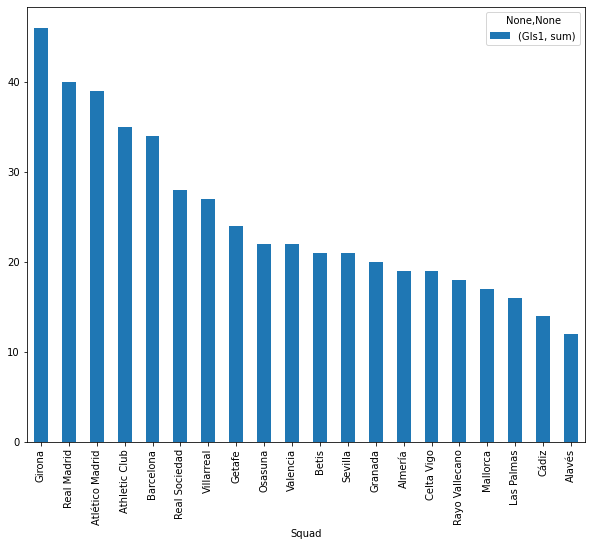

In [109]:
but_Equipe_liga.sort_values(by=('Gls1', 'sum'), ascending=False).plot(figsize=(10,8),kind="bar")

Girona est l'équipe qui marque le plus en Liga

In [110]:
#Meilleur buteurs de liga 
top_but_liga = La_Liga.groupby(['Player', 'Squad'])['Gls1'].sum().sort_values(ascending = False).head(10).reset_index()
top_but_liga

,Player,Squad,Gls1
0,Jude Bellingham,Real Madrid,13.0
1,Álvaro Morata,Atlético Madrid,12.0
2,Borja Mayoral,Getafe,12.0
3,Antoine Griezmann,Atlético Madrid,11.0
4,Artem Dovbyk,Girona,11.0
5,Gerard Moreno,Villarreal,9.0
6,Ante Budimir,Osasuna,9.0
7,Iñaki Williams,Athletic Club,8.0
8,Gorka Guruzeta,Athletic Club,8.0
9,Robert Lewandowski,Barcelona,8.0


Jude Bellingham est le meilleur buteurs de liga 

In [111]:
#Meilleur passeurs de liga 
top_passeur_liga= La_Liga[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_passeur_liga

,Player,Squad,Ast1
1205,Toni Kroos,Real Madrid,6
1916,Raphinha,Barcelona,5
152,Alex Baena,Villarreal,5
2077,Sávio,Girona,5
2440,Nico Williams,Athletic Club,5
1951,Diego Rico,Getafe,5
654,Artem Dovbyk,Girona,5
506,Yan Couto,Girona,5
1980,Rodrygo,Real Madrid,4
552,Rodrigo De Paul,Atlético Madrid,4


Toni Kroos est le meilleur passeurs de liga 

In [112]:
#Meilleurs buteurs + passeur de liga
top_but_passeur_liga = La_Liga[['Player', 'Squad','Gls1','Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:10]
top_but_passeur_liga

,Player,Squad,Gls1,Ast1,G+A1
654,Artem Dovbyk,Girona,11.0,5,16.0
222,Jude Bellingham,Real Madrid,13.0,2,15.0
887,Antoine Griezmann,Atlético Madrid,11.0,3,14.0
1462,Borja Mayoral,Getafe,12.0,1,13.0
1573,Álvaro Morata,Atlético Madrid,12.0,1,13.0
1278,Robert Lewandowski,Barcelona,8.0,4,12.0
1980,Rodrygo,Real Madrid,7.0,4,11.0
2438,Iñaki Williams,Athletic Club,8.0,3,11.0
1577,Gerard Moreno,Villarreal,9.0,2,11.0
334,Ante Budimir,Osasuna,9.0,2,11.0


Artem Dovbyk est le meilleurs buteurs + passeur de liga

In [113]:
#Meilleur buteurs sans penalty de liga 
but_sans_penalty_liga = La_Liga[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_liga

,Player,Squad,G-PK1
222,Jude Bellingham,Real Madrid,13
1573,Álvaro Morata,Atlético Madrid,12
887,Antoine Griezmann,Atlético Madrid,8
654,Artem Dovbyk,Girona,8
923,Gorka Guruzeta,Athletic Club,8
1462,Borja Mayoral,Getafe,8
2438,Iñaki Williams,Athletic Club,8
2215,Jørgen Strand Larsen,Celta Vigo,7
1577,Gerard Moreno,Villarreal,7
670,Hugo Duro,Valencia,7


Jude Bellingham est le meilleur buteurs sans penalty de liga

In [114]:
# xG Buts attendus en liga
xG_Buts_attendus_liga = La_Liga[['Player', 'Squad', 'xG1']].sort_values(by="xG1", ascending=False)[:10]
xG_Buts_attendus_liga

,Player,Squad,xG1
1278,Robert Lewandowski,Barcelona,11.8
654,Artem Dovbyk,Girona,10.1
1573,Álvaro Morata,Atlético Madrid,8.7
1462,Borja Mayoral,Getafe,8.7
923,Gorka Guruzeta,Athletic Club,8.2
887,Antoine Griezmann,Atlético Madrid,8.0
334,Ante Budimir,Osasuna,7.7
1980,Rodrygo,Real Madrid,7.5
2215,Jørgen Strand Larsen,Celta Vigo,7.3
222,Jude Bellingham,Real Madrid,7.2


Robert Lewandowski a le score xG Buts attendus de liga le plus élèver 

In [115]:
xAG_Buts_assistés_attendus_liga = La_Liga[['Player', 'Squad', 'xAG1']].sort_values(by="xAG1", ascending=False)[:10]
xAG_Buts_assistés_attendus_liga

,Player,Squad,xAG1
124,Iago Aspas,Celta Vigo,5.4
2438,Iñaki Williams,Athletic Club,5.0
1904,Largie Ramazani,Almería,4.7
1034,Isco,Betis,4.6
920,İlkay Gündoğan,Barcelona,4.5
2077,Sávio,Girona,4.4
1916,Raphinha,Barcelona,4.0
537,Sergi Darder,Mallorca,3.9
1295,Marcos Llorente,Atlético Madrid,3.9
152,Alex Baena,Villarreal,3.8


In [116]:
#les joueurs les plus agressive de liga
La_Liga[['Player', 'CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
54,Iván Alejo,10,0,10
617,Djené,9,1,10
52,Rubén Alcaraz,9,0,9
918,Gerard Gumbau,9,0,9
396,Sergi Cardona,8,0,8
721,Fali,8,0,8
1442,Jaime Mata,7,1,8
2220,Damián Suárez,7,1,8
421,Catena,6,1,7
660,Domingos Duarte,5,2,7


Iván Alejo est le joueur les plus agressifs

In [117]:
#L'équipe la plus agressive de en Liga 
Equipe_agressif_liga = La_Liga.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Equipe_agressif_liga.sort_values(by=('Total_Cards', 'sum'))

,CrdY,CrdR,Total_Cards
,sum,sum,sum
Squad,,,
Real Madrid,34,2,36
Girona,39,0,39
Celta Vigo,37,5,42
Almería,42,1,43
Betis,41,2,43
Osasuna,41,3,44
Valencia,41,4,45
Alavés,44,1,45


<AxesSubplot:xlabel='Squad'>

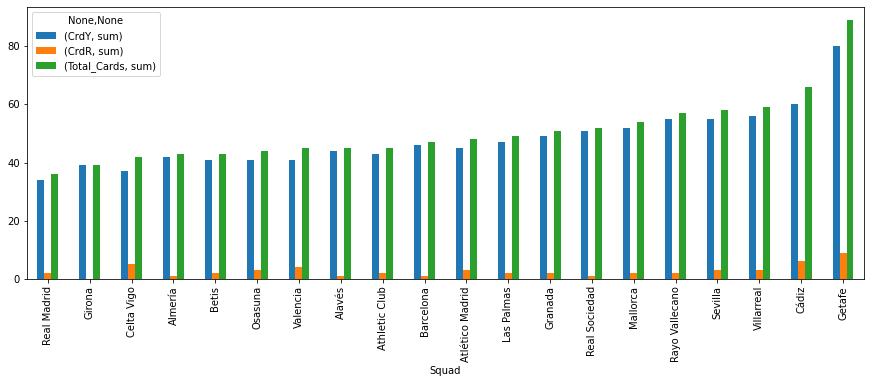

In [118]:
Equipe_agressif_liga.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

Getafe est l'équipe la plus agressive de de Liga

# Bundesliga

In [119]:
Bundesliga = df.groupby("Comp").get_group('Bundesliga')
Bundesliga

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
1,Brenden Aaronson,USA,MF,Union Berlin,Bundesliga,23,11,4,327,0.0,0,0.0,0,0,0,2,1,0.1,0.3,3
2,Paxten Aaronson,USA,MF,Eint Frankfurt,Bundesliga,20,7,1,101,0.0,1,1.0,0,0,0,0,0,0.1,0.1,0
14,Junior Adamu,AUT,"FW,MF",Freiburg,Bundesliga,22,12,0,95,0.0,0,0.0,0,0,0,0,0,0.1,0.1,0
15,Sargis Adamyan,ARM,"FW,MF",Köln,Bundesliga,30,5,0,142,0.0,1,1.0,0,0,0,1,0,0.9,0.5,1
18,Karim Adeyemi,GER,"FW,MF",Dortmund,Bundesliga,21,11,3,370,0.0,1,1.0,0,0,0,2,0,0.8,0.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,Robin Zentner,GER,GK,Mainz 05,Bundesliga,29,12,12,1080,0.0,0,0.0,0,0,0,2,0,0.0,0.0,2
2500,Cedric Zesiger,SUI,DF,Wolfsburg,Bundesliga,25,13,11,936,0.0,0,0.0,0,0,0,4,0,0.9,0.0,4
2501,Michael Zetterer,GER,GK,Werder Bremen,Bundesliga,28,9,9,810,0.0,0,0.0,0,0,0,1,0,0.0,0.0,1
2506,Christoph Zimmermann,GER,DF,Darmstadt 98,Bundesliga,30,6,5,441,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


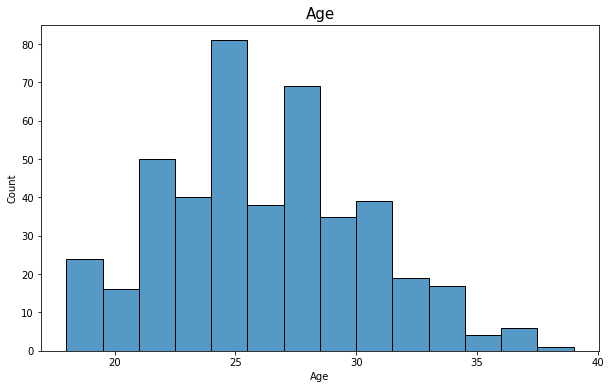

In [120]:
#Age
plt.figure(figsize=(10,6))
sns.histplot(Bundesliga["Age"])
plt.title("Age", size=15)
plt.show()

In [121]:
Bundesliga['Age'].min()

18

In [122]:
Bundesliga['Age'].max()

39

In [123]:
Bundesliga["Age"].mean()

25.981776765375855

<AxesSubplot:>

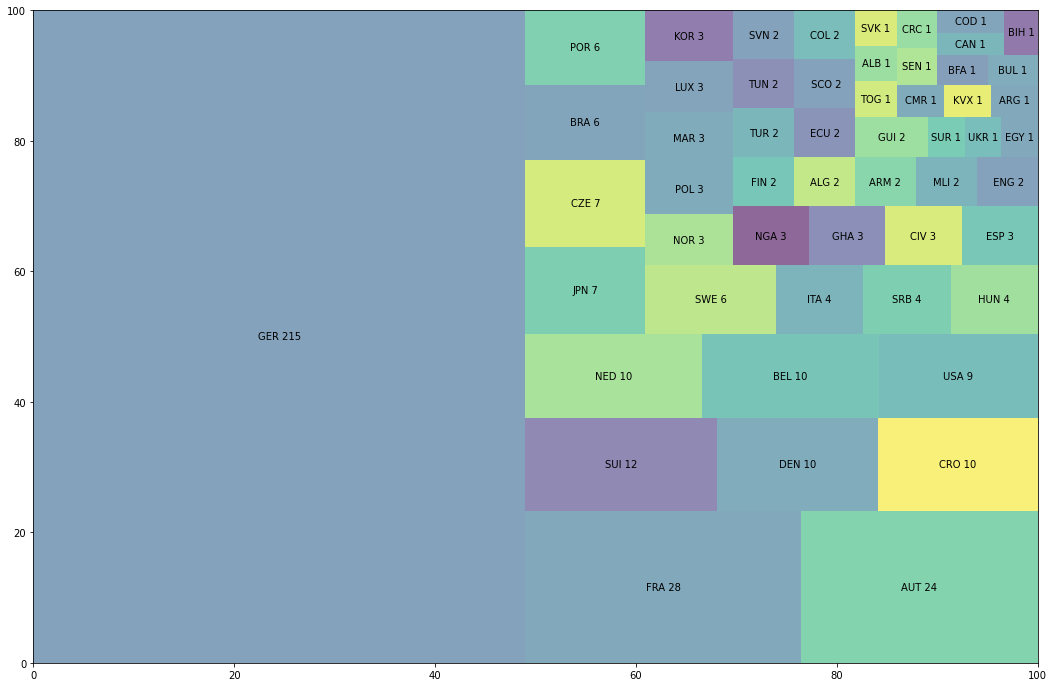

In [124]:
fig = plt.figure(figsize=(18,12))
sizes=Bundesliga.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=Bundesliga.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

<AxesSubplot:>

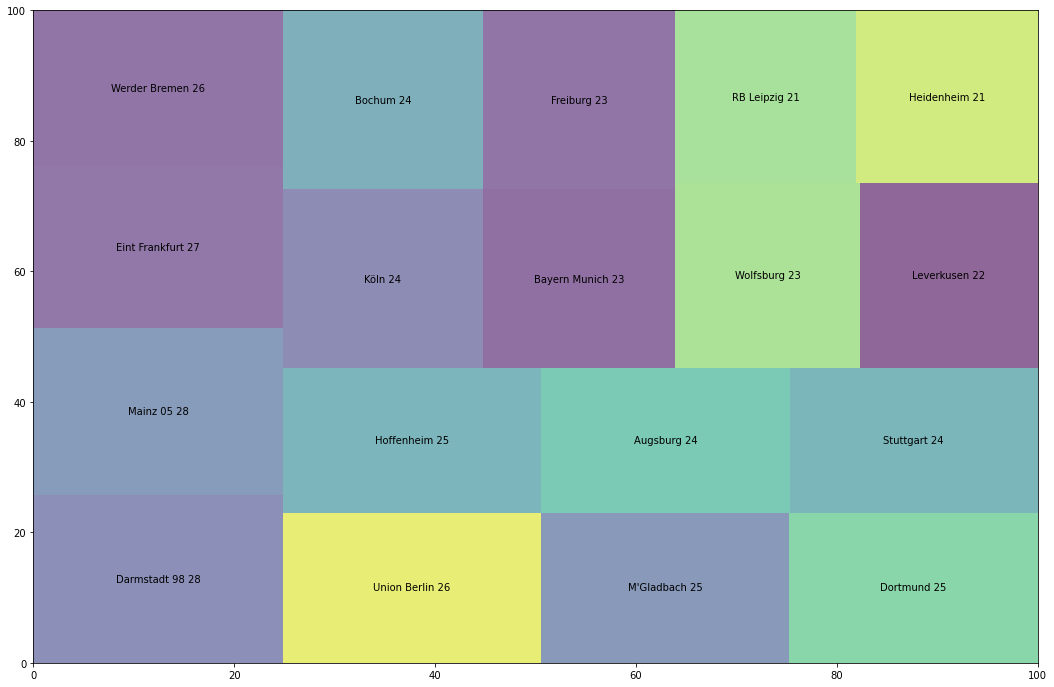

In [125]:
fig = plt.figure(figsize=(18,12))
sizes=Bundesliga.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=Bundesliga.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [126]:
#l'équipe qui a marquer le plus de but en Bundesliga
but_Equipe_Bundesliga = Bundesliga.groupby("Squad").agg({'Gls1':['sum']})
but_Equipe_Bundesliga.sort_values(by=('Gls1', 'sum'))

,Gls1
,sum
Squad,
Köln,10.0
Mainz 05,12.0
Union Berlin,17.0
Bochum,18.0
Darmstadt 98,18.0
Wolfsburg,20.0
Freiburg,20.0
Werder Bremen,22.0


<AxesSubplot:xlabel='Squad'>

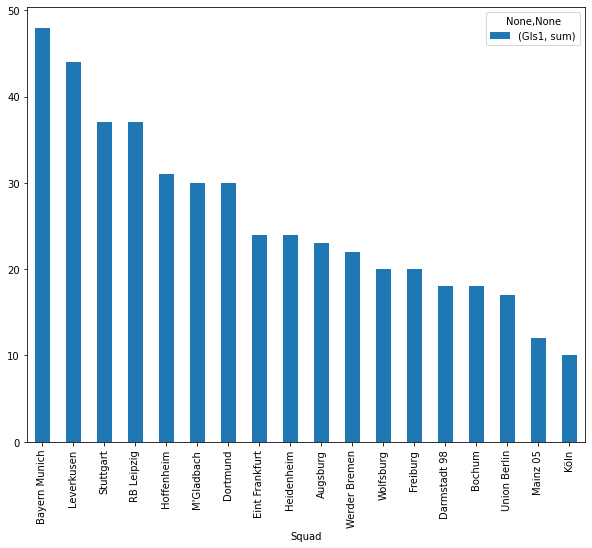

In [127]:
but_Equipe_Bundesliga.sort_values(by=('Gls1', 'sum'), ascending=False).plot(figsize=(10,8),kind="bar")

Bayern Munich est l'équipe qui a marquer le plus de but en Bundesliga

In [128]:
#Meilleur buteur de Bundesliga
top_but_Bundesliga = Bundesliga.groupby(['Player', 'Squad'])['Gls1'].sum().sort_values(ascending = False).head(10).reset_index()
top_but_Bundesliga

,Player,Squad,Gls1
0,Harry Kane,Bayern Munich,21.0
1,Serhou Guirassy,Stuttgart,17.0
2,Loïs Openda,RB Leipzig,11.0
3,Victor Boniface,Leverkusen,10.0
4,Deniz Undav,Stuttgart,9.0
5,Jonas Wind,Wolfsburg,9.0
6,Ermedin Demirović,Augsburg,8.0
7,Leroy Sané,Bayern Munich,8.0
8,Álex Grimaldo,Leverkusen,7.0
9,Omar Marmoush,Eint Frankfurt,7.0


Harry Kane est le meilleur buteurs de Bundesliga

In [129]:
#Meilleur passeur de Bundesliga
top_assists_Bundesliga= Bundesliga[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_assists_Bundesliga

,Player,Squad,Ast1
2058,Leroy Sané,Bayern Munich,8
313,Julian Brandt,Dortmund,7
286,Victor Boniface,Leverkusen,7
2449,Florian Wirtz,Leverkusen,7
2143,Xavi Simons,RB Leipzig,7
251,Jan-Niklas Beste,Heidenheim,7
1001,Franck Honorat,M'Gladbach,6
1599,Thomas Müller,Bayern Munich,6
782,Jeremie Frimpong,Leverkusen,6
888,Vincenzo Grifo,Freiburg,5


Leroy Sané est le meilleur passeur de Bundesliga

In [130]:
#Meilleur buteur sans penalty Bundesliga
but_sans_penalty_Bundesliga = Bundesliga[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_Bundesliga

,Player,Squad,G-PK1
1121,Harry Kane,Bayern Munich,18
915,Serhou Guirassy,Stuttgart,14
1728,Loïs Openda,RB Leipzig,9
2347,Deniz Undav,Stuttgart,9
2448,Jonas Wind,Wolfsburg,9
286,Victor Boniface,Leverkusen,9
2058,Leroy Sané,Bayern Munich,8
890,Álex Grimaldo,Leverkusen,7
566,Ermedin Demirović,Augsburg,7
1415,Omar Marmoush,Eint Frankfurt,6


Harry Kane est le meilleur buteur sans penalty Bundesliga

In [131]:
#meilleurs buteurs + passeur de Bundesliga
top_but_passeur_Bundesliga= Bundesliga[['Player', 'Squad','Gls1', 'Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:10]
top_but_passeur_Bundesliga

,Player,Squad,Gls1,Ast1,G+A1
1121,Harry Kane,Bayern Munich,21.0,5,26.0
915,Serhou Guirassy,Stuttgart,17.0,1,18.0
286,Victor Boniface,Leverkusen,10.0,7,17.0
2058,Leroy Sané,Bayern Munich,8.0,8,16.0
1728,Loïs Openda,RB Leipzig,11.0,4,15.0
2448,Jonas Wind,Wolfsburg,9.0,4,13.0
566,Ermedin Demirović,Augsburg,8.0,5,13.0
2347,Deniz Undav,Stuttgart,9.0,3,12.0
890,Álex Grimaldo,Leverkusen,7.0,5,12.0
313,Julian Brandt,Dortmund,5.0,7,12.0


Harry Kane est le meilleurs buteurs + passeur de Bundesliga

In [132]:
#Le meilleur score xG Buts attendus de Bundesliga
xG_Buts_attendus_Bundesliga = Bundesliga[['Player', 'Squad', 'xG1']].sort_values(by="xG1", ascending=False)[:10]
xG_Buts_attendus_Bundesliga

,Player,Squad,xG1
1121,Harry Kane,Bayern Munich,15.1
286,Victor Boniface,Leverkusen,12.1
915,Serhou Guirassy,Stuttgart,11.6
1728,Loïs Openda,RB Leipzig,10.5
2058,Leroy Sané,Bayern Munich,8.6
1161,Tim Kleindienst,Heidenheim,8.0
2347,Deniz Undav,Stuttgart,7.9
566,Ermedin Demirović,Augsburg,7.3
2448,Jonas Wind,Wolfsburg,6.3
663,Marvin Ducksch,Werder Bremen,5.5


Harry Kane a Le meilleur score xG Buts attendus de Bundesliga

In [133]:
#Le meilleur score xAG Buts assisté de Bundesliga
xAG_Buts_assistés_attendus_Bundesliga = Bundesliga[['Player', 'Squad', 'xAG1']].sort_values(by="xAG1", ascending=False)[:10]
xAG_Buts_assistés_attendus_Bundesliga

,Player,Squad,xAG1
2058,Leroy Sané,Bayern Munich,8.1
313,Julian Brandt,Dortmund,6.5
1001,Franck Honorat,M'Gladbach,5.2
1121,Harry Kane,Bayern Munich,4.9
784,Chris Führich,Stuttgart,4.9
994,Jonas Hofmann,Leverkusen,4.7
1599,Thomas Müller,Bayern Munich,4.4
2449,Florian Wirtz,Leverkusen,4.0
888,Vincenzo Grifo,Freiburg,3.7
782,Jeremie Frimpong,Leverkusen,3.6


Leroy Sané a le meilleur score xAG Buts assisté de Bundesliga

In [134]:
# Le joueur les plus agressive de Bundesliga
Bundesliga[['Player', 'CrdY', 'CrdR', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Player,CrdY,CrdR,Total_Cards
609,Eren Dinkçi,6,0,6
993,Nicolas Höfler,5,1,6
1170,Dominik Kohr,6,0,6
1881,Grischa Prömel,6,0,6
2089,Keven Schlotterbeck,6,0,6
47,Kevin Akpoguma,5,0,5
115,Maximilian Arnold,5,0,5
234,Ramy Bensebaini,4,1,5
433,Julian Chabot,4,1,5
567,Sepp van den Berg,5,0,5


Eren Dinkçi est le joueur les plus agressifs de Bundesliga

In [135]:
#L'équipe la plus agressive de Bundesliga
Aggressiv_equip_Bundesliga = Bundesliga.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Aggressiv_equip_Bundesliga.sort_values(by=('Total_Cards', 'sum'))

,CrdY,CrdR,Total_Cards
,sum,sum,sum
Squad,,,
Stuttgart,21,0,21
Bayern Munich,21,1,22
Union Berlin,22,3,25
Leverkusen,28,0,28
Köln,26,3,29
RB Leipzig,29,0,29
Dortmund,28,2,30
Freiburg,29,1,30


L'équipe la plus agressive de Bundesliga est Mainz 05 avec 47 cartons. 

# Serie A

In [136]:
Serie_A = df.groupby("Comp").get_group('Serie A')
Serie_A

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
10,Francesco Acerbi,ITA,DF,Inter,Serie A,35,15,15,1350,1.0,1,2.0,1,0,0,1,0,0.9,1.7,1
21,Yacine Adli,FRA,MF,Milan,Serie A,23,8,4,353,0.0,0,0.0,0,0,0,1,0,0.0,0.1,1
23,Michel Aebischer,SUI,MF,Bologna,Serie A,26,18,13,1135,0.0,1,1.0,0,0,0,4,0,0.2,0.8,4
26,Lucien Agoume,FRA,MF,Inter,Serie A,21,1,0,5,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
39,Marley Aké,FRA,FW,Udinese,Serie A,23,1,0,10,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,Joshua Zirkzee,NED,FW,Bologna,Serie A,22,18,17,1499,7.0,2,9.0,6,1,1,4,0,4.8,2.5,4
2509,Zito,ANG,"FW,MF",Cagliari,Serie A,21,17,10,1100,3.0,2,5.0,3,0,0,2,0,2.1,2.1,2
2511,Nadir Zortea,ITA,DF,Atalanta,Serie A,24,5,0,149,1.0,0,1.0,1,0,0,1,0,0.1,0.3,1
2516,Milan Đurić,BIH,FW,Hellas Verona,Serie A,33,17,10,977,4.0,1,5.0,3,1,2,2,0,3.2,1.1,2


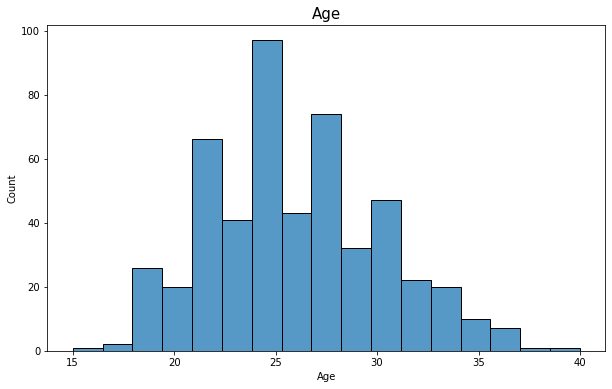

In [137]:
#Age
plt.figure(figsize=(10,6))
sns.histplot(Serie_A["Age"])
plt.title("Age", size=15)
plt.show()

In [138]:
Serie_A[Serie_A['Age']==Serie_A['Age'].min()]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
371,Francesco Camarda,ITA,FW,Milan,Serie A,15,2,0,14,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [139]:
Serie_A[Serie_A['Age']==Serie_A['Age'].max()]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,Gls1,Ast1,G+A1,G-PK1,PK,PKatt,CrdY,CrdR,xG1,xAG1,Total_Cards
1547,Antonio Mirante,ITA,GK,Milan,Serie A,40,1,1,90,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0


In [140]:
Serie_A["Age"].mean()

25.96078431372549

<AxesSubplot:>

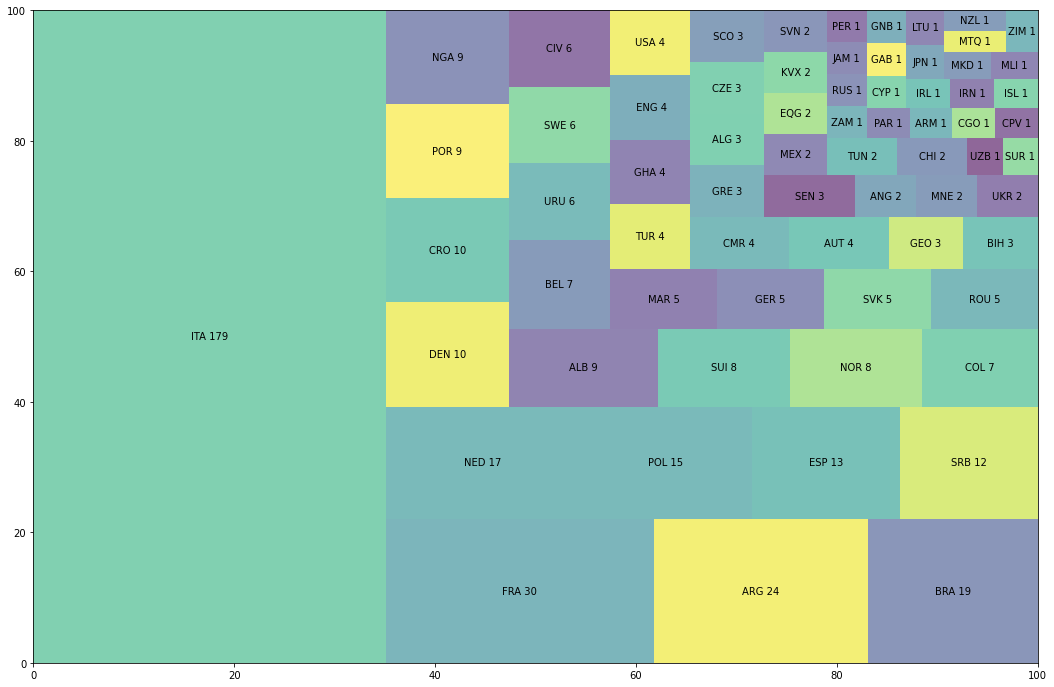

In [141]:
fig = plt.figure(figsize=(18,12))
sizes=Serie_A.groupby('Nation',)['Player'].count().sort_values(ascending= False).tolist() 
label=Serie_A.groupby('Nation',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

<AxesSubplot:>

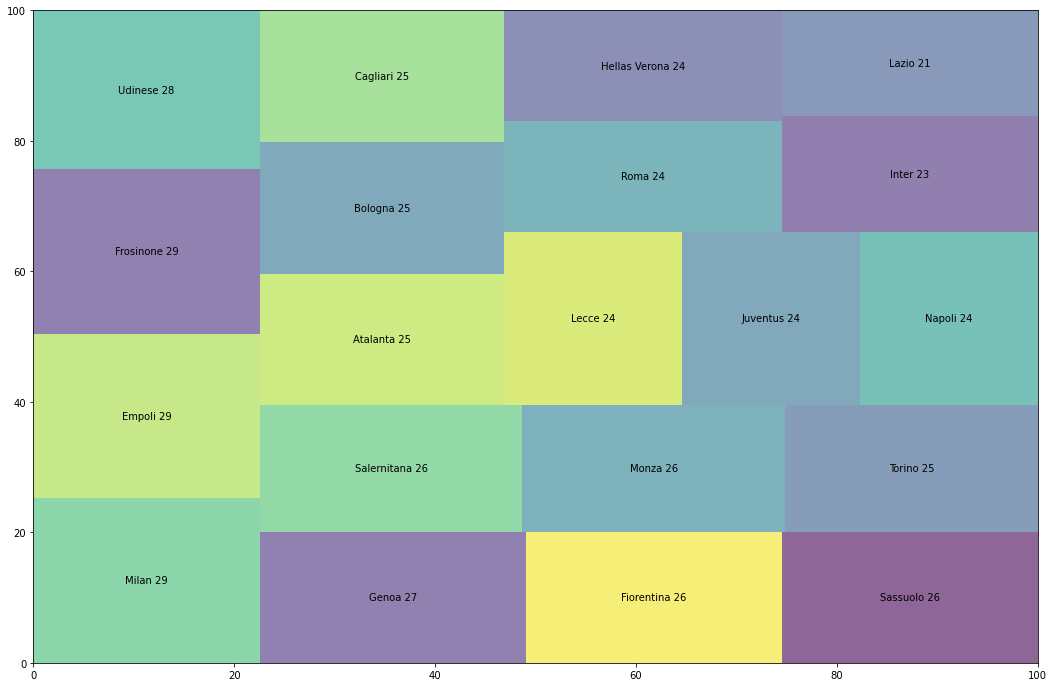

In [142]:
#Nombre de joueurs par equipes
fig = plt.figure(figsize=(18,12))
sizes=Serie_A.groupby('Squad',)['Player'].count().sort_values(ascending= False).tolist() 
label=Serie_A.groupby('Squad',)['Player'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

Milan, Empoli et Frosionne sont les équipes de Serie A  avec le plus de joueurs 29 

In [143]:
#l'équipe qui marque le plus
but_Equipe_Serie_A = Serie_A.groupby("Squad").agg({'Gls1':['sum']})
but_Equipe_Serie_A.sort_values(by=('Gls1', 'sum'))

,Gls1
,sum
Squad,
Empoli,8.0
Hellas Verona,15.0
Salernitana,15.0
Torino,15.0
Cagliari,16.0
Monza,16.0
Udinese,17.0
Genoa,19.0


<AxesSubplot:xlabel='Squad'>

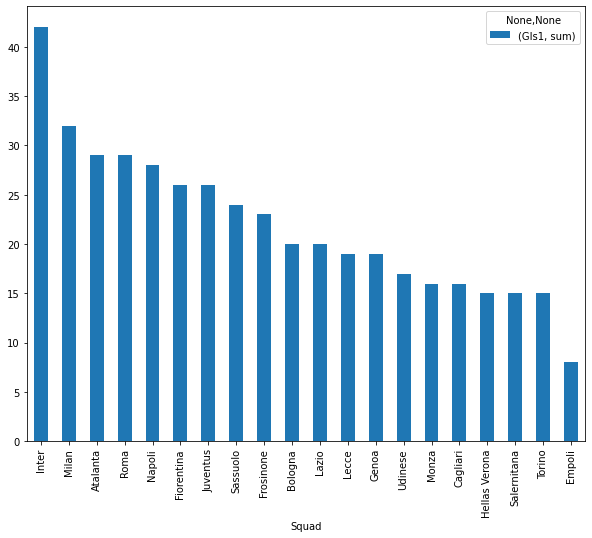

In [144]:
but_Equipe_Serie_A.sort_values(by=('Gls1', 'sum'), ascending=False).plot(figsize=(10,8),kind="bar")

l'équipe qui marque le plus est Inter avec 42 buts

In [145]:
#meilleur buteurs de liga 
top_but_Serie_A = Serie_A.groupby(['Player', 'Squad'])['Gls1'].sum().sort_values(ascending = False).head(10).reset_index()
top_but_Serie_A

,Player,Squad,Gls1
0,Lautaro Martínez,Inter,15.0
1,Domenico Berardi,Sassuolo,9.0
2,Romelu Lukaku,Roma,8.0
3,Olivier Giroud,Milan,8.0
4,Marcus Thuram,Inter,7.0
5,Ademola Lookman,Atalanta,7.0
6,Victor Osimhen,Napoli,7.0
7,Albert Guðmundsson,Genoa,7.0
8,Joshua Zirkzee,Bologna,7.0
9,Hakan Çalhanoğlu,Inter,7.0


Lautaro Martínez est le meilleur buteurs de liga 

In [146]:
#meilleur passeur de Serie_A 
top_assists_Serie_A= Serie_A[['Player', 'Squad', 'Ast1']].sort_values(by="Ast1", ascending=False)[:10]
top_assists_Serie_A

,Player,Squad,Ast1
672,Paulo Dybala,Roma,6
2282,Marcus Thuram,Inter,6
2294,Jeremy Toljan,Sassuolo,5
842,Olivier Giroud,Milan,5
88,Felipe Anderson,Lazio,5
1258,Rafael Leão,Milan,4
777,Morten Frendrup,Genoa,4
606,Federico Dimarco,Inter,4
576,Giovanni Di Lorenzo,Napoli,4
551,Charles De Ketelaere,Atalanta,4


Paulo Dybala est le meilleur passeur de Serie_A 

In [147]:
#meilleurs buteurs + passeur de Serie_A
top_but_passeur_Serie_A = Serie_A[['Player', 'Squad','Gls1', 'Ast1', 'G+A1']].sort_values(by="G+A1", ascending=False)[:10]
top_but_passeur_Serie_A

,Player,Squad,Gls1,Ast1,G+A1
1432,Lautaro Martínez,Inter,15.0,2,17.0
2282,Marcus Thuram,Inter,7.0,6,13.0
842,Olivier Giroud,Milan,8.0,5,13.0
238,Domenico Berardi,Sassuolo,9.0,3,12.0
672,Paulo Dybala,Roma,4.0,6,10.0
1887,Christian Pulisic,Milan,6.0,4,10.0
1309,Ademola Lookman,Atalanta,7.0,3,10.0
365,Hakan Çalhanoğlu,Inter,7.0,3,10.0
2508,Joshua Zirkzee,Bologna,7.0,2,9.0
1740,Victor Osimhen,Napoli,7.0,2,9.0


Lautaro Martínez est meilleurs buteurs + passeur de Serie_A

In [148]:
#meilleurs buteurs sans penalty de Serie_A
but_sans_penalty_Serie_A = Serie_A[['Player', 'Squad', 'G-PK1']].sort_values(by="G-PK1", ascending=False)[:10]
but_sans_penalty_Serie_A

,Player,Squad,G-PK1
1432,Lautaro Martínez,Inter,14
1337,Romelu Lukaku,Roma,8
1309,Ademola Lookman,Atalanta,7
2282,Marcus Thuram,Inter,7
926,Albert Guðmundsson,Genoa,6
1331,Lorenzo Lucca,Udinese,6
1857,Andrea Pinamonti,Sassuolo,6
472,Andrea Colpani,Monza,6
2508,Joshua Zirkzee,Bologna,6
1887,Christian Pulisic,Milan,6


Lautaro Martínez est le meilleurs buteurs sans penalty de Serie_A

In [149]:
xG_Buts_attendus_Serie_A = Serie_A[['Player', 'Squad', 'xG1']].sort_values(by="xG1", ascending=False)[:10]
xG_Buts_attendus_Serie_A

,Player,Squad,xG1
1432,Lautaro Martínez,Inter,9.2
2282,Marcus Thuram,Inter,9.0
1215,Khvicha Kvaratskhelia,Napoli,6.8
1740,Victor Osimhen,Napoli,6.7
2403,Dušan Vlahović,Juventus,6.7
842,Olivier Giroud,Milan,6.3
238,Domenico Berardi,Sassuolo,6.3
365,Hakan Çalhanoğlu,Inter,5.9
1337,Romelu Lukaku,Roma,5.6
1309,Ademola Lookman,Atalanta,5.5


In [150]:
xAG_Buts_assistés_attendus_Serie_A = Serie_A[['Player', 'Squad', 'xAG1']].sort_values(by="xAG1", ascending=False)[:10]
xAG_Buts_assistés_attendus_Serie_A

,Player,Squad,xAG1
1186,Filip Kostić,Juventus,4.3
606,Federico Dimarco,Inter,4.2
1258,Rafael Leão,Milan,3.6
88,Felipe Anderson,Lazio,3.5
1184,Teun Koopmeiners,Atalanta,3.5
1865,Matteo Politano,Napoli,3.4
2186,Matìas Soulé,Frosinone,3.3
1215,Khvicha Kvaratskhelia,Napoli,3.1
2504,Piotr Zieliński,Napoli,3.0
365,Hakan Çalhanoğlu,Inter,2.9


In [151]:
#Le joueur les plus agressive de Serie A
Serie_A.groupby("Player").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']}).sort_values(by=('Total_Cards', 'sum'))

,CrdY,CrdR,Total_Cards
,sum,sum,sum
Player,,,
Liam Henderson,0,0,0
Giulio Donati,0,0,0
Rareș-Cătălin Burnete,0,0,0
Grégoire Defrel,0,0,0
Guillermo Ochoa,0,0,0
...,...,...,...
Youssef Maleh,8,0,8
Ondrej Duda,7,1,8


Leandro Paredes est le joueur les plus agressifs de Serie A

In [152]:
#L'équipe la plus agressive de Serie_A
Aggressiv_equip_Serie_A= Serie_A.groupby("Squad").agg({'CrdY':['sum'],'CrdR':['sum'],'Total_Cards':['sum']})
Aggressiv_equip_Serie_A.sort_values(by=('Total_Cards', 'sum'))

,CrdY,CrdR,Total_Cards
,sum,sum,sum
Squad,,,
Inter,24,0,24
Atalanta,34,1,35
Udinese,34,2,36
Sassuolo,34,3,37
Cagliari,35,3,38
Fiorentina,39,0,39
Torino,40,0,40
Frosinone,40,1,41


<AxesSubplot:xlabel='Squad'>

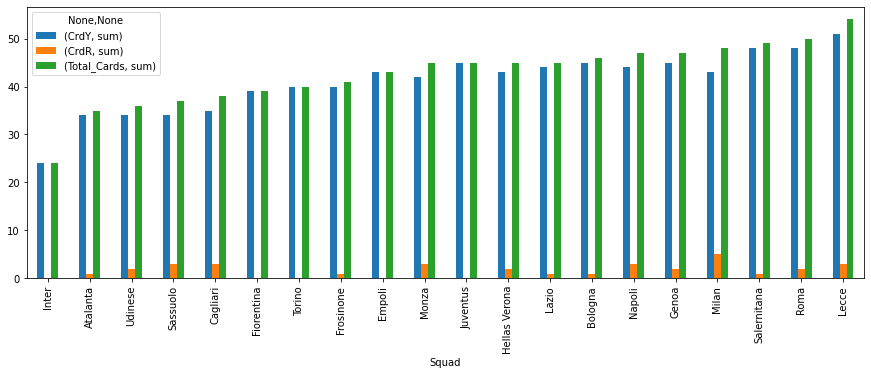

In [153]:
Aggressiv_equip_Serie_A.sort_values(by=('Total_Cards', 'sum')).plot(kind='bar',figsize=(15,5))

Lecce est l'équipe la plus agressive de Serie_A